# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [17]:
# Import warnings
import warnings
#This is to supress all warnings
warnings.filterwarnings("ignore")


In [18]:
# Import the libraries you will be using for analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [19]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.9.2
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [22]:
# Try loading one file

dfSample = pd.read_parquet('trip_records/2023-1.parquet')
dfSample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

We see there are approximately 3 Million rows for a month and it won't be a good idea to load all the data but instead use technique as suggested like sampling in a way that still gives us meaningful data without loosing important details.

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [29]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [30]:
# from google.colab import drive
# drive.mount('/content/drive')

In [31]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
dfSampled = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        #print("Reading File:", file_name)

        # Load file one at a time
        cf = pd.read_parquet(file_name)

        #As the "tpep_pickup_datetime" is already in datetime format, we will extract the day and hour from this
        cf["pu_date"] = cf["tpep_pickup_datetime"].dt.date
        cf["pu_hour"] = cf["tpep_pickup_datetime"].dt.hour

        #Sampling 5% of data from each day and hour
        sampled_data = cf.groupby(["pu_date", "pu_hour"]).apply(lambda x: x.sample(frac=0.05, random_state=42)).reset_index(drop=True)
    
        # Concatenate the sampled data of all the dates to a single dataframe
        dfSampled = pd.concat([dfSampled, sampled_data], ignore_index=True)

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

print(dfSampled.info())

Error reading file sampled_df.csv: Could not open Parquet input source '<Buffer>': Parquet magic bytes not found in footer. Either the file is corrupted or this is not a parquet file.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2095958 entries, 0 to 2095957
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amou

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [33]:
# Store the df in csv/parquet
dfSampled.to_parquet('sampled_df.parquet', index=False)

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [36]:
# Load the new data file
sampled_df = pd.read_parquet('sampled_df')

In [37]:
sampled_df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-11-30 23:58:12   2023-12-01 00:06:58              1.0   
1         2  2023-11-30 23:58:35   2023-12-01 00:06:32              1.0   
2         2  2023-12-01 00:27:51   2023-12-01 00:50:12              1.0   
3         2  2023-12-01 00:38:48   2023-12-01 01:01:55              NaN   
4         2  2023-12-01 00:06:19   2023-12-01 00:16:57              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           1.31         1.0                  N           163           162   
1           1.22         1.0                  N           161           229   
2           3.99         1.0                  N           148            50   
3           4.79         NaN               None           231            61   
4           1.05         1.0                  N           161           161   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0             1  ...      0.5        3.00           0.0   
1             1  ...      0.5        1.43           0.0   
2             1  ...      0.5        5.66           0.0   
3             0  ...      0.5        3.00           0.0   
4             1  ...      0.5        3.14           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  \
0                    1.0         18.00                   2.5          0.0   
1                    1.0         15.73                   2.5          0.0   
2                    1.0         33.96                   2.5          0.0   
3                    1.0         29.43                   NaN          NaN   
4                    1.0         18.84                   2.5          0.0   

      pu_date  pu_hour airport_fee  
0  2023-11-30       23         NaN  
1  2023-11-30       23         NaN  
2  2023-12-01        0         NaN  
3  2023-12-01        0         NaN  
4  2023-12-01        0         NaN  

[5 rows x 22 columns]

In [38]:
sampled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [41]:
# Fix the index and drop any columns that are not needed
#Index was already fixed above, we could set indexing to pickup_datetime column that would make analysis easy time wise but refraining from it as there seems to be some questions around it.

#Dropping columns store_and_fwd_flag as this is not going to be helpful in determining the business profitability.
sampled_df.drop(['store_and_fwd_flag'], axis=1, inplace=True)
sampled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 21 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   PULocationID           int64         
 7   DOLocationID           int64         
 8   payment_type           int64         
 9   fare_amount            float64       
 10  extra                  float64       
 11  mta_tax                float64       
 12  tip_amount             float64       
 13  tolls_amount           float64       
 14  improvement_surcharge  float64       
 15  total_amount           float64       
 16  congestion_surcharge   float64       
 17  Airport_fee            float64       
 18  pu_date               

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [43]:
# Combine the two airport fee columns

#Checking the null values to analyze "airport_fee" and "Airport_fee" columns
print(sampled_df["airport_fee"].isnull().sum())
print(sampled_df["Airport_fee"].isnull().sum())
print(sampled_df["airport_fee"].max())
print(sampled_df["Airport_fee"].max())
# As the "airport_fee" columns seems to have mostly null values, it is safe to take the max of either column value to replace the non-existent ones in "Airport_fee"
sampled_df["airport_fee"] = sampled_df[["airport_fee", "Airport_fee"]].max(axis=1)
print(sampled_df["airport_fee"].isnull().sum())

#Drop Airport_Fee collumn as we merged both in airport_fee
sampled_df.drop(['Airport_fee'], axis=1, inplace=True)
sampled_df.info()

1747917
213357
1.25
1.75
64874
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   PULocationID           int64         
 7   DOLocationID           int64         
 8   payment_type           int64         
 9   fare_amount            float64       
 10  extra                  float64       
 11  mta_tax                float64       
 12  tip_amount             float64       
 13  tolls_amount           float64       
 14  improvement_surcharge  float64       
 15  total_amount           float64       
 16  congestion_surcharge   float64       
 17  pu_date                object     

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [45]:
# check where values of fare amount are negative
sampled_df[sampled_df["fare_amount"] < 0]
print(sampled_df[sampled_df["fare_amount"] < 0].count())

# There are no negative values in fare_amount

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
pu_date                  0
pu_hour                  0
airport_fee              0
dtype: int64


Did you notice something different in the `RatecodeID` column for above records?

In [47]:
# Analyse RatecodeID for the negative fare amounts
print(sampled_df[sampled_df["fare_amount"] < 0]["RatecodeID"].value_counts())

#There doesn't seem to be any RatecodeID that belongs to any negative fare amount as there are no negative fare amounts

Series([], Name: count, dtype: int64)


In [48]:
# Find which columns have negative values
negative_columns = (sampled_df.select_dtypes(include=['number']) < 0).sum()
print(negative_columns[negative_columns > 0])


extra                     3
mta_tax                  73
improvement_surcharge    78
total_amount             78
congestion_surcharge     56
airport_fee              15
dtype: int64


In [49]:
# fix these negative values
# pd.set_option('display.max_rows', None) 
display(sampled_df[(sampled_df.select_dtypes(include=['number']) < 0).any(axis=1)])

#As we can see the fare amount in these cases is 0 and this data seems like erroneous, in order to fix these, it is better to remove these records, also there is only 79 in total that should not impact our analysis
#Removing the data
cleaned_sample = sampled_df[~(sampled_df.select_dtypes(include=['number']) < 0).any(axis=1)]
cleaned_sample.reset_index(drop=True, inplace=True)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
25600           2  2023-12-05 15:54:13   2023-12-05 15:54:37              1.0   
49571           2  2023-12-09 08:34:26   2023-12-09 08:34:35              1.0   
66396           2  2023-12-12 06:57:09   2023-12-12 07:16:37              1.0   
101346          2  2023-12-17 08:10:57   2023-12-17 08:28:46              1.0   
113242          2  2023-12-19 15:33:14   2023-12-19 16:05:27              2.0   
...           ...                  ...                   ...              ...   
1846434         2  2023-06-21 16:01:44   2023-06-21 17:11:47              1.0   
1857861         2  2023-06-23 15:19:43   2023-06-23 15:36:43              1.0   
1867124         2  2023-06-25 05:59:41   2023-06-25 06:08:22              2.0   
1889809         2  2023-06-29 17:52:22   2023-06-29 18:11:03              1.0   
1895713         2  2023-06-30 21:37:09   2023-06-30 21:46:00              2.0   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
25600             0.00         1.0           132           132             2   
49571             0.00         2.0           107           137             2   
66396             3.30         1.0           164           239             2   
101346           11.27         1.0           132            70             2   
113242            5.83         1.0           186            87             2   
...                ...         ...           ...           ...           ...   
1846434          12.56         2.0           132           114             2   
1857861           2.14         1.0           142           164             2   
1867124           1.09         2.0            90           170             2   
1889809           2.93         1.0           246           239             2   
1895713           1.38         2.0           249           186             2   

         fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
25600            0.0    0.0     -0.5         0.0           0.0   
49571            0.0    0.0     -0.5         0.0           0.0   
66396            0.0    0.0     -0.5         0.0           0.0   
101346           0.0    0.0     -0.5         0.0           0.0   
113242           0.0    0.0     -0.5         0.0           0.0   
...              ...    ...      ...         ...           ...   
1846434          0.0    0.0     -0.5         0.0           0.0   
1857861          0.0    0.0     -0.5         0.0           0.0   
1867124          0.0    0.0     -0.5         0.0           0.0   
1889809          0.0    0.0     -0.5         0.0           0.0   
1895713          0.0    0.0     -0.5         0.0           0.0   

         improvement_surcharge  total_amount  congestion_surcharge  \
25600                     -1.0         -1.50                   0.0   
49571                     -1.0         -4.00                  -2.5   
66396                     -1.0         -4.00                  -2.5   
101346                    -1.0         -3.25                   0.0   
113242                    -1.0         -4.00                  -2.5   
...                        ...           ...                   ...   
1846434                   -1.0         -5.75                  -2.5   
1857861                   -1.0         -4.00                  -2.5   
1867124                   -1.0         -4.00                  -2.5   
1889809                   -1.0         -4.00                  -2.5   
1895713                   -1.0         -4.00                  -2.5   

            pu_date  pu_hour  airport_fee  
25600    2023-12-05       15         0.00  
49571    2023-12-09        8         0.00  
66396    2023-12-12        6         0.00  
101346   2023-12-17        8        -1.75  
113242   2023-12-19       15         0.00  
...             ...      ...          ...  
1846434  2023-06-21       16        -1.75  
1857861  2023-06-23       15         0.00  
1867124  2023-06-25        5         0.00  
1

In [50]:
cleaned_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896321 entries, 0 to 1896320
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   PULocationID           int64         
 7   DOLocationID           int64         
 8   payment_type           int64         
 9   fare_amount            float64       
 10  extra                  float64       
 11  mta_tax                float64       
 12  tip_amount             float64       
 13  tolls_amount           float64       
 14  improvement_surcharge  float64       
 15  total_amount           float64       
 16  congestion_surcharge   float64       
 17  pu_date                object        
 18  pu_hour               

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [53]:
# Find the proportion of missing values in each column
print(cleaned_sample.isnull().mean())


VendorID                 0.00000
tpep_pickup_datetime     0.00000
tpep_dropoff_datetime    0.00000
passenger_count          0.03421
trip_distance            0.00000
RatecodeID               0.03421
PULocationID             0.00000
DOLocationID             0.00000
payment_type             0.00000
fare_amount              0.00000
extra                    0.00000
mta_tax                  0.00000
tip_amount               0.00000
tolls_amount             0.00000
improvement_surcharge    0.00000
total_amount             0.00000
congestion_surcharge     0.03421
pu_date                  0.00000
pu_hour                  0.00000
airport_fee              0.03421
dtype: float64


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [55]:
# Display the rows with null values
#Displaying all null rows
# null_rows = cleaned_sample[cleaned_sample.isnull().any(axis=1)]
# display(null_rows)

#Displaying null rows for 'passenger_count'
passenger_null_rows = cleaned_sample[cleaned_sample['passenger_count'].isnull()]
display(passenger_null_rows)

# Impute NaN values in 'passenger_count'
# Imputing with most frequent number of passengers and as we know that taxis usually carry 1 passenger and mode verifies that, it would be the best option to impute missing values in 'passenger_count'
cleaned_sample['passenger_count'].fillna(cleaned_sample['passenger_count'].mode()[0], inplace=True)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
3               2  2023-12-01 00:38:48   2023-12-01 01:01:55              NaN   
5               2  2023-12-01 00:00:50   2023-12-01 00:14:37              NaN   
29              2  2023-12-01 00:01:11   2023-12-01 00:15:53              NaN   
124             2  2023-12-01 00:02:18   2023-12-01 00:12:25              NaN   
129             1  2023-12-01 00:04:14   2023-12-01 00:25:16              NaN   
...           ...                  ...                   ...              ...   
1896214         1  2023-06-30 23:14:07   2023-06-30 23:25:45              NaN   
1896230         2  2023-06-30 23:40:46   2023-07-01 00:04:37              NaN   
1896273         2  2023-06-30 23:57:33   2023-07-01 00:09:15              NaN   
1896294         2  2023-06-30 23:36:40   2023-06-30 23:53:20              NaN   
1896304         1  2023-06-30 23:34:22   2023-07-01 00:32:59              NaN   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
3                 4.79         NaN           231            61             0   
5                 2.08         NaN           137           144             0   
29                3.49         NaN           164           262             0   
124               1.79         NaN           142           239             0   
129               0.00         NaN           186            74             0   
...                ...         ...           ...           ...           ...   
1896214           0.70         NaN           230           186             0   
1896230           4.46         NaN           143            79             0   
1896273           2.75         NaN           166           142             0   
1896294           5.18         NaN           148           237             0   
1896304          20.20         NaN           132            74             0   

         fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
3              22.43   0.00      0.5        3.00          0.00   
5              17.22   0.00      0.5        0.00          0.00   
29             17.83   0.00      0.5        0.00          0.00   
124             9.88   0.00      0.5        0.00          0.00   
129            30.31   0.00      0.5        0.00          0.00   
...              ...    ...      ...         ...           ...   
1896214        11.40   1.00      0.5        2.46          0.00   
1896230        23.26   0.00      0.5        0.00          0.00   
1896273        16.14   0.00      0.5        0.00          0.00   
1896294        26.09   0.00      0.5        3.01          0.00   
1896304        70.00   1.75      0.5       11.97          6.55   

         improvement_surcharge  total_amount  congestion_surcharge  \
3                          1.0         29.43                   NaN   
5                          1.0         21.22                   NaN   
29                         1.0         21.83                   NaN   
124                        1.0         13.88                   NaN   
129                        1.0         34.31                   NaN   
...                        ...           ...                   ...   
1896214                    1.0         18.86                   NaN   
1896230                    1.0         27.26                   NaN   
1896273                    1.0         20.14                   NaN   
1896294                    1.0         33.10                   NaN   
1896304                    1.0         91.77                   NaN   

            pu_date  pu_hour  airport_fee  
3        2023-12-01        0          NaN  
5        2023-12-01        0          NaN  
29       2023-12-01        0          NaN  
124      2023-12-01        0          NaN  
129      2023-12-01        0          NaN  
...             ...      ...          ...  
1896214  2023-06-30       23          NaN  
1896230  2023-06-30       23          NaN  
1896273  2023-06-30       23          NaN  
1

Did you find zeroes in passenger_count? Handle these.

In [57]:
#Finding rows for 0 as 'passenger count'
passenger_zero_rows = cleaned_sample[cleaned_sample['passenger_count'] == 0]
display(passenger_zero_rows)

# Imputing or replacing 0 to 1 due to the same reason mentioned above
cleaned_sample['passenger_count'] = cleaned_sample['passenger_count'].replace(0.0, 1.0)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
154             1  2023-12-01 00:05:19   2023-12-01 00:15:55              0.0   
175             1  2023-12-01 00:21:40   2023-12-01 00:46:40              0.0   
351             1  2023-12-01 02:08:45   2023-12-01 02:13:30              0.0   
384             1  2023-12-01 03:18:05   2023-12-01 03:24:36              0.0   
532             1  2023-12-01 06:22:43   2023-12-01 06:25:21              0.0   
...           ...                  ...                   ...              ...   
1896081         1  2023-06-30 22:25:07   2023-06-30 22:47:27              0.0   
1896084         1  2023-06-30 22:03:14   2023-06-30 22:15:21              0.0   
1896093         1  2023-06-30 22:29:55   2023-06-30 22:30:20              0.0   
1896108         1  2023-06-30 23:22:19   2023-06-30 23:40:26              0.0   
1896226         1  2023-06-30 23:41:15   2023-07-01 00:05:00              0.0   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
154                2.5         1.0           162           262             1   
175               17.6         2.0           132           162             1   
351                1.4         1.0           249           186             1   
384                1.3         1.0            90           137             1   
532                0.3         1.0           237           161             1   
...                ...         ...           ...           ...           ...   
1896081            5.3         1.0           142           231             1   
1896084            2.6         1.0           142            41             1   
1896093            0.0         5.0           170           170             1   
1896108            1.3         1.0            87           232             2   
1896226            7.9         1.0           163            66             2   

         fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
154             13.5   3.50      0.5        3.70          0.00   
175             70.0   4.25      0.5       14.06          6.94   
351              7.9   3.50      0.5        2.55          0.00   
384              8.6   3.50      0.5        1.63          0.00   
532              5.1   2.50      0.5        1.80          0.00   
...              ...    ...      ...         ...           ...   
1896081         25.4   3.50      0.5        7.55          0.00   
1896084         14.2   3.50      0.5        1.80          0.00   
1896093         19.0   0.00      0.0        4.00          0.00   
1896108         15.6   3.50      0.5        0.00          0.00   
1896226         33.8   3.50      0.5        0.00          0.00   

         improvement_surcharge  total_amount  congestion_surcharge  \
154                        1.0         22.20                   2.5   
175                        1.0         96.75                   2.5   
351                        1.0         15.45                   2.5   
384                        1.0         15.23                   2.5   
532                        1.0         10.90                   2.5   
...                        ...           ...                   ...   
1896081                    1.0         37.95                   2.5   
1896084                    1.0         21.00                   2.5   
1896093                    1.0         24.00                   0.0   
1896108                    1.0         20.60                   2.5   
1896226                    1.0         38.80                   2.5   

            pu_date  pu_hour  airport_fee  
154      2023-12-01        0         0.00  
175      2023-12-01        0         1.75  
351      2023-12-01        2         0.00  
384      2023-12-01        3         0.00  
532      2023-12-01        6         0.00  
...             ...      ...          ...  
1896081  2023-06-30       22         0.00  
1896084  2023-06-30       22         0.00  
1896093  2023-06-30       22         0.00  
1

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [59]:
# Fix missing values in 'RatecodeID'
#checking for missing values
rate_null_rows = cleaned_sample[cleaned_sample['RatecodeID'].isnull()]
display(rate_null_rows)

# Imputing with mode as that makes more sense for this coulumn that tells us the most frequently used RatecodeID
cleaned_sample['RatecodeID'].fillna(cleaned_sample['RatecodeID'].mode()[0], inplace=True)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
3               2  2023-12-01 00:38:48   2023-12-01 01:01:55              1.0   
5               2  2023-12-01 00:00:50   2023-12-01 00:14:37              1.0   
29              2  2023-12-01 00:01:11   2023-12-01 00:15:53              1.0   
124             2  2023-12-01 00:02:18   2023-12-01 00:12:25              1.0   
129             1  2023-12-01 00:04:14   2023-12-01 00:25:16              1.0   
...           ...                  ...                   ...              ...   
1896214         1  2023-06-30 23:14:07   2023-06-30 23:25:45              1.0   
1896230         2  2023-06-30 23:40:46   2023-07-01 00:04:37              1.0   
1896273         2  2023-06-30 23:57:33   2023-07-01 00:09:15              1.0   
1896294         2  2023-06-30 23:36:40   2023-06-30 23:53:20              1.0   
1896304         1  2023-06-30 23:34:22   2023-07-01 00:32:59              1.0   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
3                 4.79         NaN           231            61             0   
5                 2.08         NaN           137           144             0   
29                3.49         NaN           164           262             0   
124               1.79         NaN           142           239             0   
129               0.00         NaN           186            74             0   
...                ...         ...           ...           ...           ...   
1896214           0.70         NaN           230           186             0   
1896230           4.46         NaN           143            79             0   
1896273           2.75         NaN           166           142             0   
1896294           5.18         NaN           148           237             0   
1896304          20.20         NaN           132            74             0   

         fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
3              22.43   0.00      0.5        3.00          0.00   
5              17.22   0.00      0.5        0.00          0.00   
29             17.83   0.00      0.5        0.00          0.00   
124             9.88   0.00      0.5        0.00          0.00   
129            30.31   0.00      0.5        0.00          0.00   
...              ...    ...      ...         ...           ...   
1896214        11.40   1.00      0.5        2.46          0.00   
1896230        23.26   0.00      0.5        0.00          0.00   
1896273        16.14   0.00      0.5        0.00          0.00   
1896294        26.09   0.00      0.5        3.01          0.00   
1896304        70.00   1.75      0.5       11.97          6.55   

         improvement_surcharge  total_amount  congestion_surcharge  \
3                          1.0         29.43                   NaN   
5                          1.0         21.22                   NaN   
29                         1.0         21.83                   NaN   
124                        1.0         13.88                   NaN   
129                        1.0         34.31                   NaN   
...                        ...           ...                   ...   
1896214                    1.0         18.86                   NaN   
1896230                    1.0         27.26                   NaN   
1896273                    1.0         20.14                   NaN   
1896294                    1.0         33.10                   NaN   
1896304                    1.0         91.77                   NaN   

            pu_date  pu_hour  airport_fee  
3        2023-12-01        0          NaN  
5        2023-12-01        0          NaN  
29       2023-12-01        0          NaN  
124      2023-12-01        0          NaN  
129      2023-12-01        0          NaN  
...             ...      ...          ...  
1896214  2023-06-30       23          NaN  
1896230  2023-06-30       23          NaN  
1896273  2023-06-30       23          NaN  
1

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [61]:
# handle null values in congestion_surcharge
#checking for null values
#checking for missing values
cs_null_rows = cleaned_sample[cleaned_sample['congestion_surcharge'].isnull()]
display(cs_null_rows)

# Imputing with mode as that makes more sense for this coulumn that tells us the most frequently used 'congestion_surcharge'
cleaned_sample['congestion_surcharge'].fillna(cleaned_sample['congestion_surcharge'].mode()[0], inplace=True)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
3               2  2023-12-01 00:38:48   2023-12-01 01:01:55              1.0   
5               2  2023-12-01 00:00:50   2023-12-01 00:14:37              1.0   
29              2  2023-12-01 00:01:11   2023-12-01 00:15:53              1.0   
124             2  2023-12-01 00:02:18   2023-12-01 00:12:25              1.0   
129             1  2023-12-01 00:04:14   2023-12-01 00:25:16              1.0   
...           ...                  ...                   ...              ...   
1896214         1  2023-06-30 23:14:07   2023-06-30 23:25:45              1.0   
1896230         2  2023-06-30 23:40:46   2023-07-01 00:04:37              1.0   
1896273         2  2023-06-30 23:57:33   2023-07-01 00:09:15              1.0   
1896294         2  2023-06-30 23:36:40   2023-06-30 23:53:20              1.0   
1896304         1  2023-06-30 23:34:22   2023-07-01 00:32:59              1.0   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
3                 4.79         1.0           231            61             0   
5                 2.08         1.0           137           144             0   
29                3.49         1.0           164           262             0   
124               1.79         1.0           142           239             0   
129               0.00         1.0           186            74             0   
...                ...         ...           ...           ...           ...   
1896214           0.70         1.0           230           186             0   
1896230           4.46         1.0           143            79             0   
1896273           2.75         1.0           166           142             0   
1896294           5.18         1.0           148           237             0   
1896304          20.20         1.0           132            74             0   

         fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
3              22.43   0.00      0.5        3.00          0.00   
5              17.22   0.00      0.5        0.00          0.00   
29             17.83   0.00      0.5        0.00          0.00   
124             9.88   0.00      0.5        0.00          0.00   
129            30.31   0.00      0.5        0.00          0.00   
...              ...    ...      ...         ...           ...   
1896214        11.40   1.00      0.5        2.46          0.00   
1896230        23.26   0.00      0.5        0.00          0.00   
1896273        16.14   0.00      0.5        0.00          0.00   
1896294        26.09   0.00      0.5        3.01          0.00   
1896304        70.00   1.75      0.5       11.97          6.55   

         improvement_surcharge  total_amount  congestion_surcharge  \
3                          1.0         29.43                   NaN   
5                          1.0         21.22                   NaN   
29                         1.0         21.83                   NaN   
124                        1.0         13.88                   NaN   
129                        1.0         34.31                   NaN   
...                        ...           ...                   ...   
1896214                    1.0         18.86                   NaN   
1896230                    1.0         27.26                   NaN   
1896273                    1.0         20.14                   NaN   
1896294                    1.0         33.10                   NaN   
1896304                    1.0         91.77                   NaN   

            pu_date  pu_hour  airport_fee  
3        2023-12-01        0          NaN  
5        2023-12-01        0          NaN  
29       2023-12-01        0          NaN  
124      2023-12-01        0          NaN  
129      2023-12-01        0          NaN  
...             ...      ...          ...  
1896214  2023-06-30       23          NaN  
1896230  2023-06-30       23          NaN  
1896273  2023-06-30       23          NaN  
1

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [63]:
# Handle any remaining missing values
#checking null values in airport_fee
af_null_rows = cleaned_sample[cleaned_sample['airport_fee'].isnull()]
display(af_null_rows)

# Imputing with 0 as that makes more sense for this column because 'airport_fee' is only charged at the pickup from JFK or Laudradale airport where the RatecodeID should be 2 or 3 but in these cases where airport_fee is nan the RatecodeID is 1 so we can impute it with 0
cleaned_sample['airport_fee'].fillna(0, inplace=True)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
3               2  2023-12-01 00:38:48   2023-12-01 01:01:55              1.0   
5               2  2023-12-01 00:00:50   2023-12-01 00:14:37              1.0   
29              2  2023-12-01 00:01:11   2023-12-01 00:15:53              1.0   
124             2  2023-12-01 00:02:18   2023-12-01 00:12:25              1.0   
129             1  2023-12-01 00:04:14   2023-12-01 00:25:16              1.0   
...           ...                  ...                   ...              ...   
1896214         1  2023-06-30 23:14:07   2023-06-30 23:25:45              1.0   
1896230         2  2023-06-30 23:40:46   2023-07-01 00:04:37              1.0   
1896273         2  2023-06-30 23:57:33   2023-07-01 00:09:15              1.0   
1896294         2  2023-06-30 23:36:40   2023-06-30 23:53:20              1.0   
1896304         1  2023-06-30 23:34:22   2023-07-01 00:32:59              1.0   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
3                 4.79         1.0           231            61             0   
5                 2.08         1.0           137           144             0   
29                3.49         1.0           164           262             0   
124               1.79         1.0           142           239             0   
129               0.00         1.0           186            74             0   
...                ...         ...           ...           ...           ...   
1896214           0.70         1.0           230           186             0   
1896230           4.46         1.0           143            79             0   
1896273           2.75         1.0           166           142             0   
1896294           5.18         1.0           148           237             0   
1896304          20.20         1.0           132            74             0   

         fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
3              22.43   0.00      0.5        3.00          0.00   
5              17.22   0.00      0.5        0.00          0.00   
29             17.83   0.00      0.5        0.00          0.00   
124             9.88   0.00      0.5        0.00          0.00   
129            30.31   0.00      0.5        0.00          0.00   
...              ...    ...      ...         ...           ...   
1896214        11.40   1.00      0.5        2.46          0.00   
1896230        23.26   0.00      0.5        0.00          0.00   
1896273        16.14   0.00      0.5        0.00          0.00   
1896294        26.09   0.00      0.5        3.01          0.00   
1896304        70.00   1.75      0.5       11.97          6.55   

         improvement_surcharge  total_amount  congestion_surcharge  \
3                          1.0         29.43                   2.5   
5                          1.0         21.22                   2.5   
29                         1.0         21.83                   2.5   
124                        1.0         13.88                   2.5   
129                        1.0         34.31                   2.5   
...                        ...           ...                   ...   
1896214                    1.0         18.86                   2.5   
1896230                    1.0         27.26                   2.5   
1896273                    1.0         20.14                   2.5   
1896294                    1.0         33.10                   2.5   
1896304                    1.0         91.77                   2.5   

            pu_date  pu_hour  airport_fee  
3        2023-12-01        0          NaN  
5        2023-12-01        0          NaN  
29       2023-12-01        0          NaN  
124      2023-12-01        0          NaN  
129      2023-12-01        0          NaN  
...             ...      ...          ...  
1896214  2023-06-30       23          NaN  
1896230  2023-06-30       23          NaN  
1896273  2023-06-30       23          NaN  
1

In [64]:
# Checking if there are any more missing values
print(cleaned_sample.isnull().mean())

VendorID                 0.0
tpep_pickup_datetime     0.0
tpep_dropoff_datetime    0.0
passenger_count          0.0
trip_distance            0.0
RatecodeID               0.0
PULocationID             0.0
DOLocationID             0.0
payment_type             0.0
fare_amount              0.0
extra                    0.0
mta_tax                  0.0
tip_amount               0.0
tolls_amount             0.0
improvement_surcharge    0.0
total_amount             0.0
congestion_surcharge     0.0
pu_date                  0.0
pu_hour                  0.0
airport_fee              0.0
dtype: float64


### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [67]:
# Checking the data type and converting to neumeric where it should be of neumeric type
print(cleaned_sample.dtypes)

cleaned_sample['passenger_count'] = pd.to_numeric(cleaned_sample['passenger_count'], errors='coerce')

VendorID                          int64
tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
pu_date                          object
pu_hour                           int32
airport_fee                     float64
dtype: object


In [68]:
# cleaned_sample = cleaned_sample.drop(columns=['level_0', 'index'], errors='ignore')

print(cleaned_sample.head())

   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-11-30 23:58:12   2023-12-01 00:06:58              1.0   
1         2  2023-11-30 23:58:35   2023-12-01 00:06:32              1.0   
2         2  2023-12-01 00:27:51   2023-12-01 00:50:12              1.0   
3         2  2023-12-01 00:38:48   2023-12-01 01:01:55              1.0   
4         2  2023-12-01 00:06:19   2023-12-01 00:16:57              1.0   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           1.31         1.0           163           162             1   
1           1.22         1.0           161           229             1   
2           3.99         1.0           148            50             1   
3           4.79         1.0           231            61             0   
4           1.05         1.0           161           161             1   

   fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0        10.00    1.0      0.5        3.00  

In [69]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
# We can detect outliers by simply using the IQR

# Method to check outliers
import numpy as np

def find_outliers(data):
    outlier = {}

    for column in data.select_dtypes(include=np.number):
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.80)   # Trying to keeps some higher side values as well
        IQR = Q3 - Q1
        lb = Q1 - 1.5 * IQR
        ub = Q3 + 1.5 * IQR

        #Making sure there are no nan values 
        filtered_column = data[column].dropna()
        
        outliers = data[(filtered_column < lb) | (filtered_column > ub)]
        outlier[column] = len(outliers)

    return outlier

check_outliers = find_outliers(cleaned_sample)
print(check_outliers)

#As we can see there are multiple outliers throughout


{'VendorID': 444, 'passenger_count': 78283, 'trip_distance': 192345, 'RatecodeID': 102238, 'PULocationID': 0, 'DOLocationID': 0, 'payment_type': 403949, 'fare_amount': 135781, 'extra': 34047, 'mta_tax': 17865, 'tip_amount': 110083, 'tolls_amount': 153802, 'improvement_surcharge': 2181, 'total_amount': 175859, 'congestion_surcharge': 140875, 'pu_hour': 0, 'airport_fee': 160947}


In [70]:
#Let's define a method to remove the outliers
def remove_outliers(data, col):
    
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.80) # Trying to keeps some higher side values as well
    IQR = Q3 - Q1
    lb = Q1 - 1.5 * IQR
    ub = Q3 + 1.5 * IQR

    or_df = data[(data[col] >= lb) & (data[col] <= ub)]

    return or_df

# Print records before removing outliers
print("Before:", len(cleaned_sample))

# Removing outliers
for col in check_outliers:
    cleaned_sample = remove_outliers(cleaned_sample, col)

# Print records after removing outliers
print("After:", len(cleaned_sample))

Before: 1896321
After: 1179399


**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [74]:
# remove passenger_count > 6
print("Before: ", len(cleaned_sample))

opt_df = cleaned_sample[cleaned_sample['passenger_count'] <= 6]

print("After: ", len(opt_df))

Before:  1179399
After:  1179399


In [75]:
# Continue with outlier handling

#Removing outliers for trip_distance less than 0.2 because that would be way small trip
print("Before: ", len(opt_df))
opt_df = opt_df[~((opt_df['trip_distance'] <= 0.1) & (opt_df['fare_amount'] > 300))]
print("After: ", len(opt_df))


Before:  1179399
After:  1179399


In [76]:

#Removing Entries where trip_distance and fare_amount are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
print("Before: ", len(opt_df))
opt_df = opt_df[~((opt_df['trip_distance'] == 0) & (opt_df['fare_amount'] == 0) & (opt_df['PULocationID'] != opt_df['DOLocationID']))]
print("After: ", len(opt_df))


Before:  1179399
After:  1179398


In [77]:

#Removing Entries where trip_distance is more than 250 miles
print("Before: ", len(opt_df))
opt_df = opt_df[~(opt_df['trip_distance'] >= 250)]
print("After: ", len(opt_df))

Before:  1179398
After:  1179398


In [78]:

#Removing Entries where payment_type is 0 (there is no payment_type 0 defined in the data dictionary)
print("Before: ", len(opt_df))
opt_df = opt_df[~(opt_df['payment_type'] == 0)]
print("After: ", len(opt_df))

Before:  1179398
After:  1179398


In [79]:

#Removing Entries where total_payment is less than or equal to 2 or greater than 600 as these are outliers for taxi and not common
print("Before: ", len(opt_df))
opt_df = opt_df[~((opt_df['total_amount'] <= 2) | (opt_df['total_amount'] >= 600))]
print("After: ", len(opt_df))

Before:  1179398
After:  1179398


In [80]:
#Removing duplicate entries (if there are any)
print("Before: ", len(opt_df))
opt_df = opt_df.drop_duplicates()
print("After: ", len(opt_df))

Before:  1179398
After:  1179398


In [81]:

# Removing entries where the trip duration is more than or equal to 4 hours but the total amount is less than or equal to 60 as it wouldn't make sense for such long trip and they are not common
print("Before: ", len(opt_df))
opt_df['trip_duration'] = (opt_df['tpep_dropoff_datetime'] - opt_df['tpep_pickup_datetime']).dt.total_seconds() / 60  # in minutes
opt_df = opt_df[~(((opt_df['trip_duration'] >= 240) & (opt_df['total_amount'] <= 60.0)) | ((opt_df['trip_duration'] <= 1) & (opt_df['total_amount'] >= 30.0)))]
print("After: ", len(opt_df))

Before:  1179398
After:  1178659


In [82]:

# Removing the entries where tip_amount is more than the double of the fare_amount as this seems very uncommon
print("Before: ", len(opt_df))
opt_df = opt_df[~(opt_df['tip_amount'] > 2*opt_df['fare_amount'])]
print("After: ", len(opt_df))

Before:  1178659
After:  1178613


In [83]:
# Do any columns need standardising?
# We can probably standardise columns like 'fare_amount', 'total_amount', 'mta_tax', 'toll_amount' and 'trip_distance', etc but I do not see that it is must in this case. This does help in better analysis and outlier detection and resolution.

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [85]:
opt_df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'pu_date',
 'pu_hour',
 'airport_fee',
 'trip_duration']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

## Categorise the varaibles into Numerical or Categorical.

- VendorID: Categorical
- tpep_pickup_datetime: Categorical
- tpep_dropoff_datetime: Categorical
- passenger_count: Numerical
- trip_distance: Numerical
- RatecodeID: Categorical
- PULocationID: Categorical
- DOLocationID: Categorical
- payment_type: Categorical
- pickup_hour: Numerical
- trip_duration: Numerical

The following monetary parameters belong in the same category, is it categorical or numerical?

fare_amount
extra
mta_tax
tip_amount
tolls_amount
improvement_surcharge
total_amount
congestion_surcharge
airport_fee


### Answer: These are all Numerical type

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

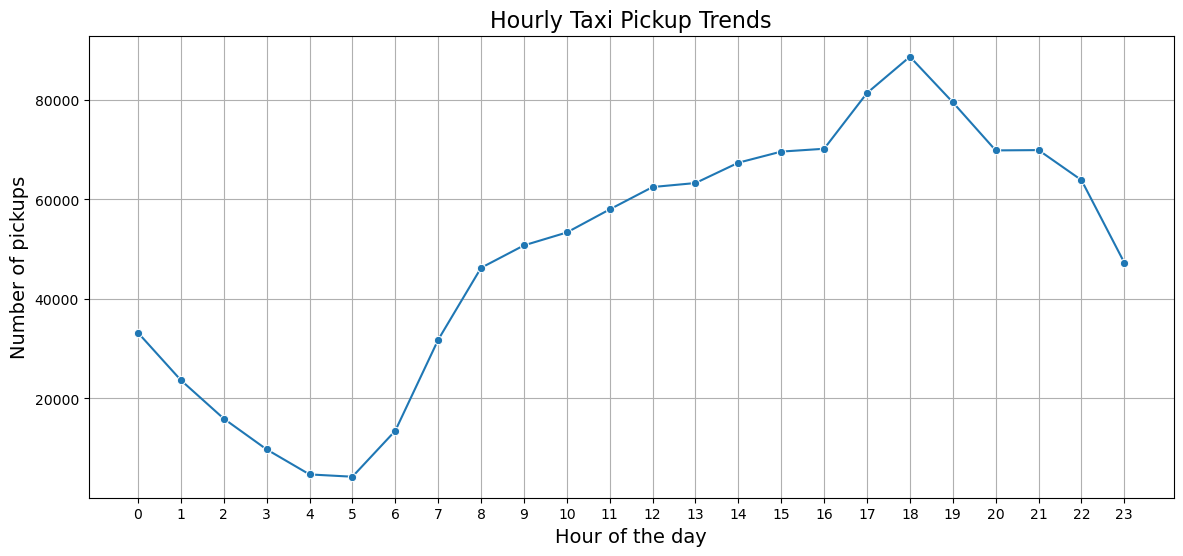

In [91]:
# Find and show the hourly trends in taxi pickups

# We will use 'pu_hour' from our dataframe to analyze the hourly trend
hourly_pickups = opt_df['pu_hour'].value_counts().sort_index()

# Plot hourly trend
plt.figure(figsize=(14, 6))
sns.lineplot(x=hourly_pickups.index, y=hourly_pickups.values, marker='o', linestyle='-')

# Customize plot
plt.xlabel('Hour of the day', fontsize=14)
plt.ylabel('Number of pickups', fontsize=14)
plt.title('Hourly Taxi Pickup Trends', fontsize=16)
plt.xticks(range(0, 24))
plt.grid(True)

# Show Plot
plt.show()


### Insights from the chart above
- We can see the morning to evening hours have higher demands with highest around 6 PM, likely due to office timings

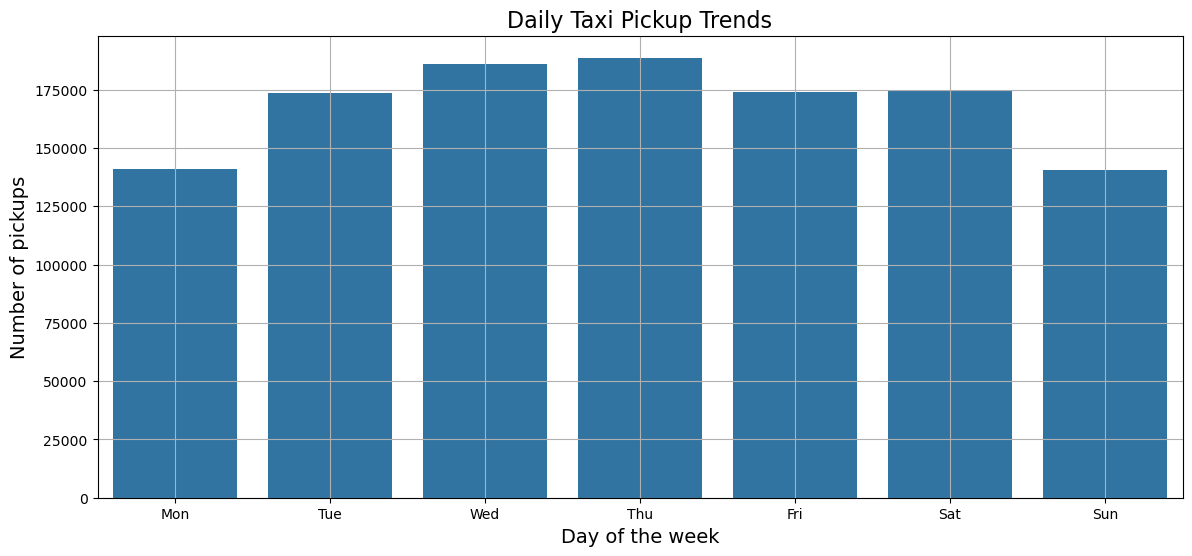

In [93]:
# Find and show the daily trends in taxi pickups (days of the week)
# We will use pickup datetime column from our dataframe to analyze the daily trend
opt_df['pu_dayofweek'] = opt_df['tpep_pickup_datetime'].dt.dayofweek #( 0 = Mon, 6 = Sun)

# Count daily pickups
daily_pickups = opt_df['pu_dayofweek'].value_counts().sort_index()

# Lets label the days for better presentation
day_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# Now lets set the index or label them with days
daily_pickups.index = day_labels

# Plot hourly trend
plt.figure(figsize=(14, 6))
sns.barplot(x=daily_pickups.index, y=daily_pickups.values)

# Customize plot
plt.xlabel('Day of the week', fontsize=14)
plt.ylabel('Number of pickups', fontsize=14)
plt.title('Daily Taxi Pickup Trends', fontsize=16)
plt.grid(True)

# Show Plot
plt.show()


### Insights from the chart
- Interestingly, we see that the demand for taxi is much higher in between the week Tue - Sat compared to the other days and on the lower side on Sun and Mon, this could be because more and more people using taxi for work and might be taking other means of transport. As we also know that Mon is workday so Sundays gets slower.

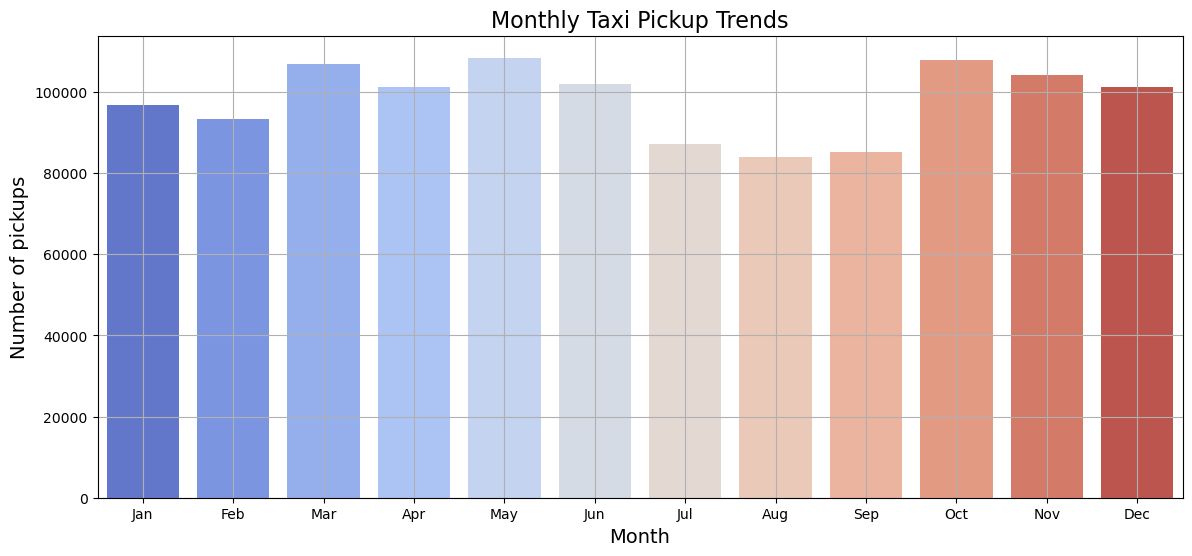

In [95]:
# Show the monthly trends in pickups

# We will use pickup datetime column from our dataframe to analyze the daily trend
opt_df['pu_month'] = opt_df['tpep_pickup_datetime'].dt.month #( 0 = Jan, 11 = Dec)

# Count daily pickups
monthly_pickups = opt_df['pu_month'].value_counts().sort_index()

# Lets label the days for better presentation
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Now lets set the index or label them with days
monthly_pickups.index = month_labels

# Plot hourly trend
plt.figure(figsize=(14, 6))
sns.barplot(x=monthly_pickups.index, y=monthly_pickups.values, palette="coolwarm")

# Customize plot
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of pickups', fontsize=14)
plt.title('Monthly Taxi Pickup Trends', fontsize=16)
plt.grid(True)

# Show Plot
plt.show()

### Insights from the chart above
- Jul, Aug, Sept seems to be the slowest month with highest being around Mar - Jun and Oct - Dec. As we know there is a party vibe around the end of the year and the begnining of the year. Mar - Jun seems to be the work work related traffic and also some spring break traffic.

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [99]:
# Analyse the above parameters
# Let's check the above financial related columns
fin_df = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

# Checking for negative values
neg_values = opt_df[fin_df] < 0
neg_counts = neg_values.sum()

# Checking for zero values
zero_values = opt_df[fin_df] == 0
zero_counts = zero_values.sum()

# Print
print(f"Negative values count: \n{neg_counts}")
print(f"Zero values count: \n{zero_counts}")


Negative values count: 
fare_amount      0
tip_amount       0
total_amount     0
trip_distance    0
dtype: int64
Zero values count: 
fare_amount          0
tip_amount       40786
total_amount         0
trip_distance     3186
dtype: int64


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [102]:
# Create a df with non zero entries for the selected parameters.
print("Before:", len(opt_df))
fin_opt_df = opt_df[opt_df['tip_amount'] > 0]
print("After:", len(fin_opt_df))

# Not removing zero values from 'trip_distance' as this an be zero due to a roundtrip kind of scenarios

Before: 1178613
After: 1137827


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

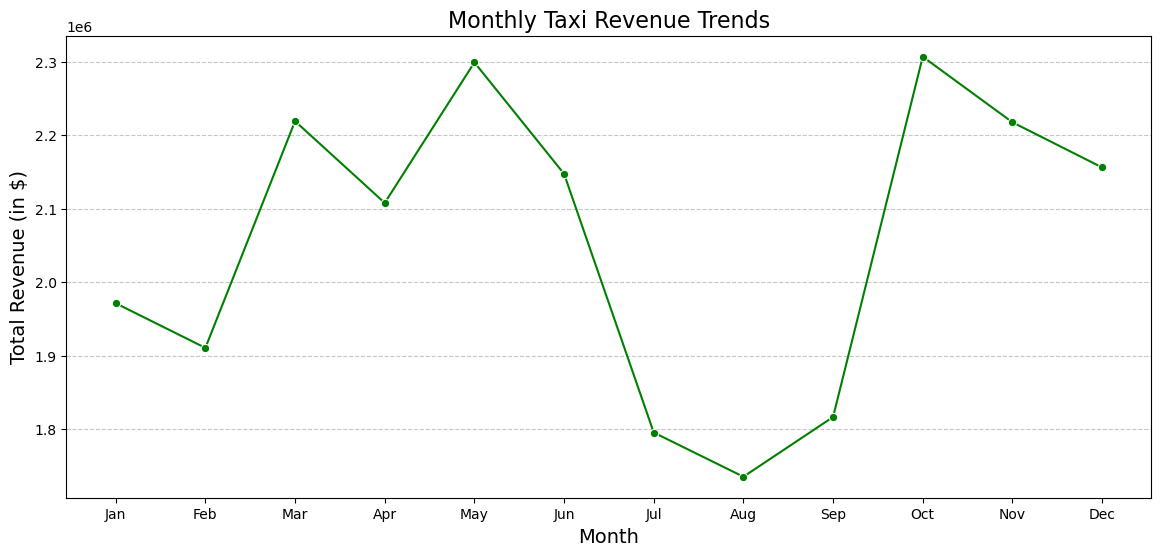

In [104]:
# Group data by month and analyse monthly revenue
# Considering the financial dataframe and not the opt_df for this financial analysis

# Calculating monthly revenue
monthly_revenue = fin_opt_df.groupby('pu_month')['total_amount'].sum()

# Lets label the days for better presentation
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Now lets set the index or label them with days
monthly_revenue.index = month_labels

# Plot hourly trend
plt.figure(figsize=(14, 6))
sns.lineplot(x=monthly_revenue.index, y=monthly_revenue.values, marker='o', color='g')

# Customize plot
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Revenue (in $)', fontsize=14)
plt.title('Monthly Taxi Revenue Trends', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show Plot
plt.show()


### Insights from the above chart
- It does reciprocate the fact that we had slower monthly taxi pickups around Jul - Sept and we can see the lower revenue for the same reason and highest revenue around Mar- May and Oct - Dec.

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

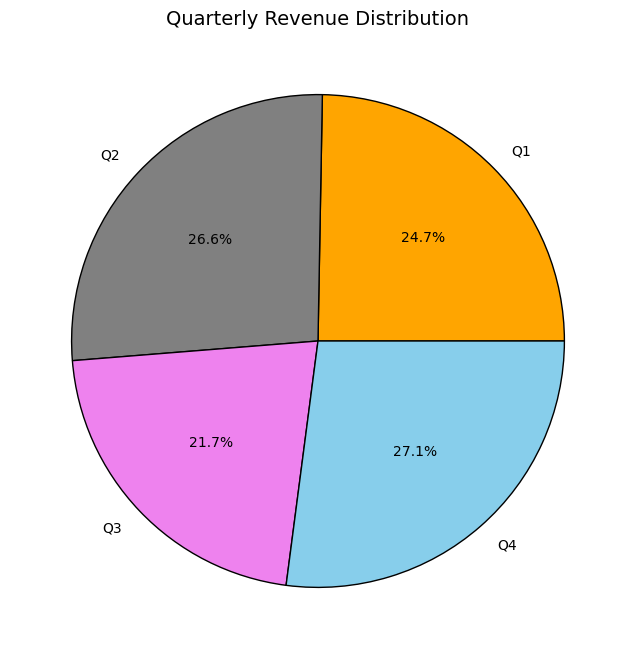

In [107]:
# Calculate proportion of each quarter
# Extract quarter from the given datetime field
fin_opt_df['quarter'] = fin_opt_df['tpep_pickup_datetime'].dt.quarter

# Calculating revenue per quarter so grouping by
quarterly_revenue = fin_opt_df.groupby('quarter')['total_amount'].sum()

# Plotting on a pie plot for better presentation
plt.figure(figsize=(8, 8))
plt.pie(quarterly_revenue, labels=['Q1', 'Q2', 'Q3', 'Q4'], autopct='%1.1f%%', colors=['orange', 'gray', 'violet', 'skyblue'], wedgeprops={'edgecolor': 'black'})
plt.title("Quarterly Revenue Distribution", fontsize=14)
plt.show()


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

Correlation value between Trip Distance and Fare Amount:  0.8856712401953006


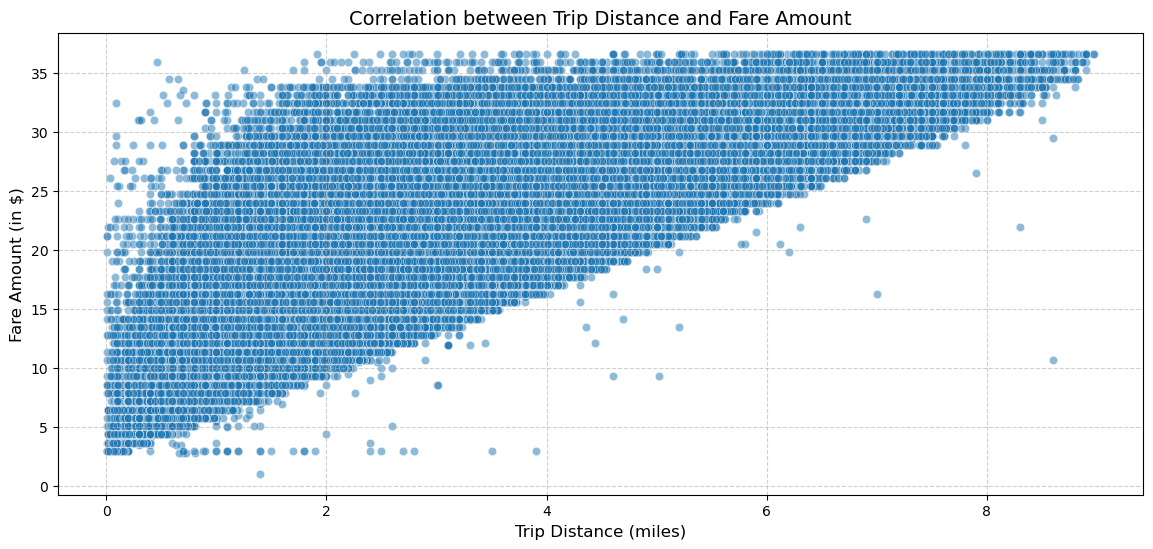

In [109]:
# Show how trip fare is affected by distance
non_zero_trip_distance = fin_opt_df[fin_opt_df['trip_distance'] > 0]

#correlation value calculation
corr_val = non_zero_trip_distance['trip_distance'].corr(non_zero_trip_distance['fare_amount'])
print("Correlation value between Trip Distance and Fare Amount: ", corr_val)

# Using scatter plot to show the visualization
plt.figure(figsize=(14, 6))
sns.scatterplot(x=non_zero_trip_distance['trip_distance'], y=non_zero_trip_distance['fare_amount'], alpha=0.5)

# Customize plot
plt.xlabel('Trip Distance (miles)', fontsize=12)
plt.ylabel('Fare Amount (in $)', fontsize=12)
plt.title('Correlation between Trip Distance and Fare Amount', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)

# Show Plot
plt.show()

### Insights from the above chart
- We can see the corr_val of around 0.89 means there is a strong correlation, that is the fare amount increases with increase in distance.
- There are some anomalies in the data where there are higher fares for smaller distances as well, which could be due to data errors or higher fixed charges etc.

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

Correlation value between Trip Duration and Fare Amount:  0.9337249888739478


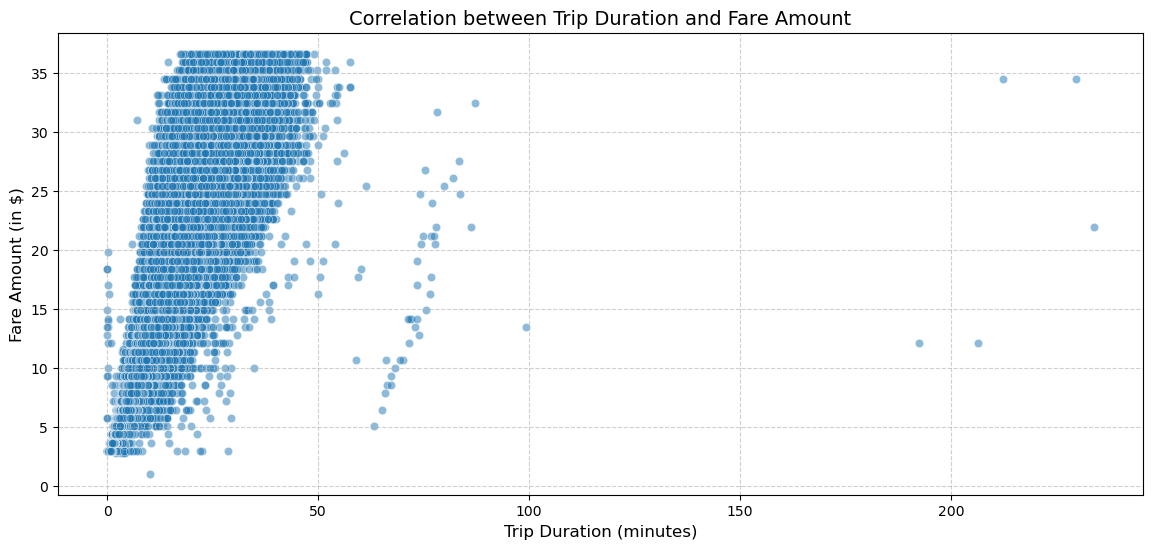

In [112]:
# Show relationship between fare and trip duration

# Show how trip fare is affected by duration
non_zero_trip_duration = fin_opt_df[fin_opt_df['trip_duration'] > 0]

#correlation value calculation
corr_val = non_zero_trip_duration['trip_duration'].corr(non_zero_trip_duration['fare_amount'])
print("Correlation value between Trip Duration and Fare Amount: ", corr_val)

# Using scatter plot to show the visualization
plt.figure(figsize=(14, 6))
sns.scatterplot(x=non_zero_trip_duration['trip_duration'], y=non_zero_trip_duration['fare_amount'], alpha=0.5)

# Customize plot
plt.xlabel('Trip Duration (minutes)', fontsize=12)
plt.ylabel('Fare Amount (in $)', fontsize=12)
plt.title('Correlation between Trip Duration and Fare Amount', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)

# Show Plot
plt.show()

### Insights from the above chart
- We can see the corr_val of around 0.93 means there is a strong correlation, that is the fare amount increases with increase in duration.
- There are some anomalies in the data where there are higher duration for smaller fare as well, which could be due to data errors.

Correlation value between Passenger Count and Fare Amount:  0.020945777726052238


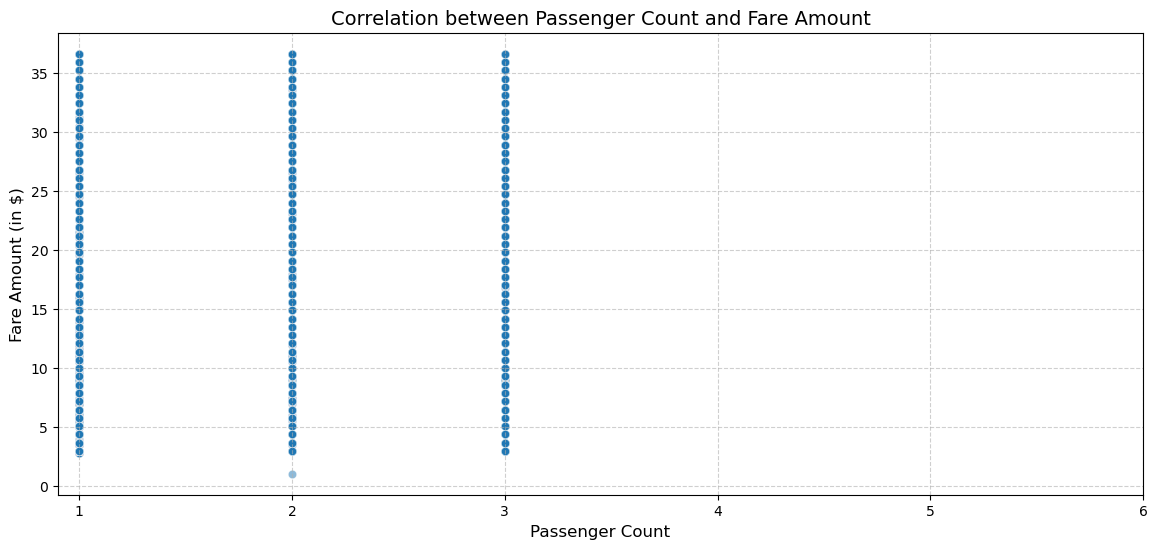

In [114]:
# Show relationship between fare and number of passengers
#correlation value calculation
corr_val = fin_opt_df['passenger_count'].corr(fin_opt_df['fare_amount'])
print("Correlation value between Passenger Count and Fare Amount: ", corr_val)

# Using scatter plot to show the visualization
plt.figure(figsize=(14, 6))
sns.scatterplot(x=fin_opt_df['passenger_count'], y=fin_opt_df['fare_amount'], alpha=0.5)

# Customize plot
plt.xlabel('Passenger Count', fontsize=12)
plt.ylabel('Fare Amount (in $)', fontsize=12)
plt.xticks(range(1,7,1))
plt.title('Correlation between Passenger Count and Fare Amount', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)

# Show Plot
plt.show()


### Insights from the above chart
- As it can be seen that the corr_val of 0.02 shows very weak to no correlation between number of passengers and fare amount.
- We also know that it doesn't matter if there are 1 or more than 1 passengers for a taxi ride, the charges are based on distance, type of taxi, duration etc but as the whole taxi is occupied when rented so it doesn't get impacted by number of passengers to most extent. 

Correlation value between Tip Amount and Trip Distance:  0.5823115709640326


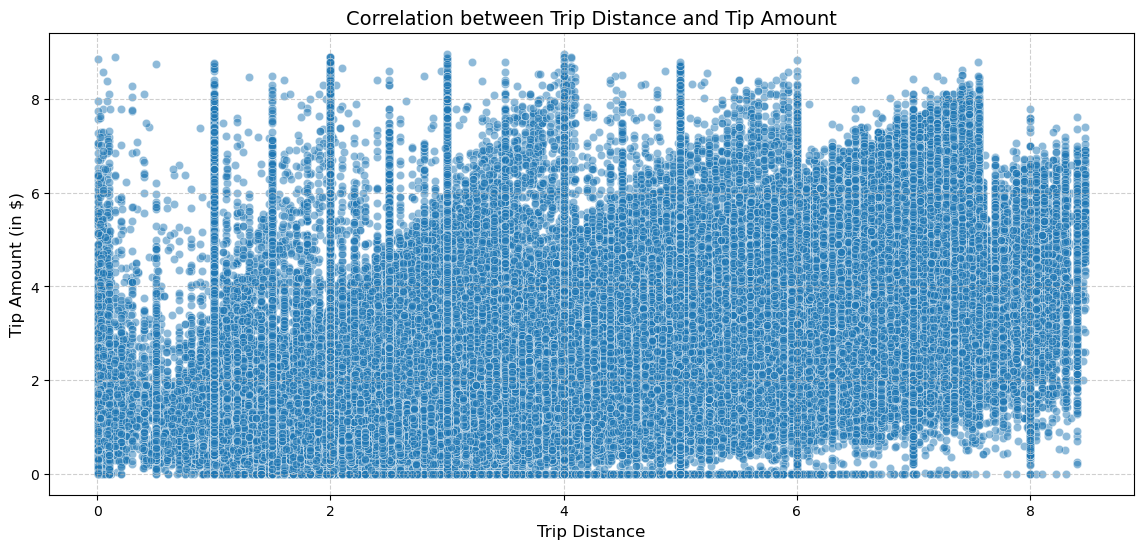

In [116]:
# Show relationship between tip and trip distance

#correlation value calculation
corr_val = fin_opt_df['tip_amount'].corr(fin_opt_df['trip_distance'])
print("Correlation value between Tip Amount and Trip Distance: ", corr_val)

# Using scatter plot to show the visualization
plt.figure(figsize=(14, 6))
sns.scatterplot(x=fin_opt_df['tip_amount'], y=fin_opt_df['trip_distance'], alpha=0.5)

# Customize plot
plt.xlabel('Trip Distance', fontsize=12)
plt.ylabel('Tip Amount (in $)', fontsize=12)
plt.title('Correlation between Trip Distance and Tip Amount', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)

# Show Plot
plt.show()

### Insights from the above chart
- As it can be seen that the corr_val of 0.58 shows there is a positive correlation between Trip Distance and Tip Amount that is it is fair to say that longer distance will fetch some good tip amount but that is not always true.
- We can see that there are some anomalies in data where even a very small distance can have higher tip amount and higher trip distance might not even get any tip which could be due to some erroneous data or simply not getting a tip for higher fares.

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

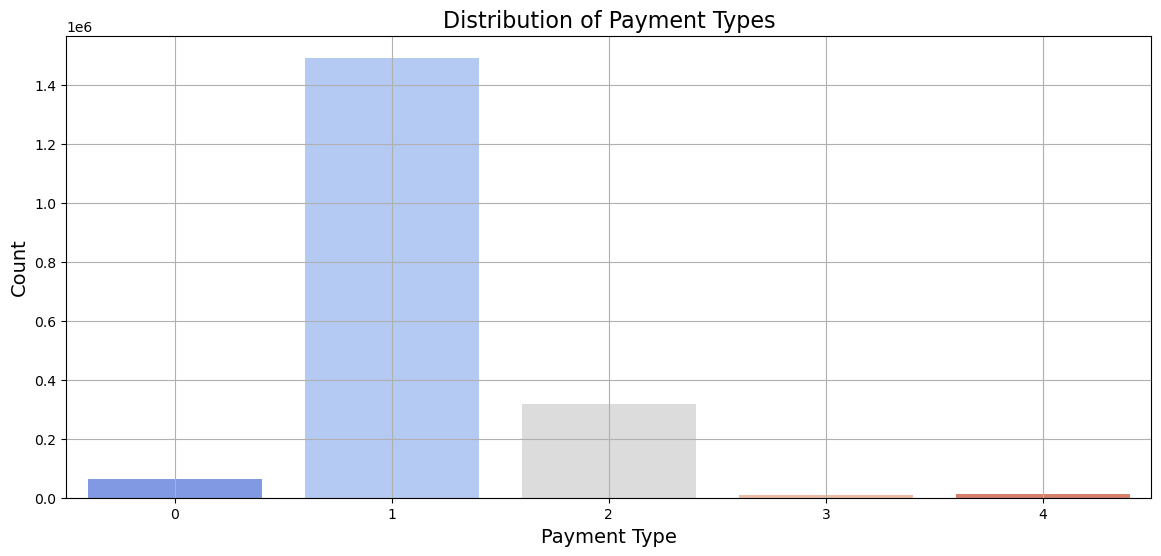

In [119]:
# Analyse the distribution of different payment types (payment_type).

# print("0: ", (sampled_df['payment_type'] == 0).sum())
# print("1: ", (sampled_df['payment_type'] == 1).sum())
# print("2: ", (sampled_df['payment_type'] == 2).sum())
# print("3: ", (sampled_df['payment_type'] == 3).sum())
# print("4: ", (sampled_df['payment_type'] == 4).sum())
# print("5: ", (sampled_df['payment_type'] == 5).sum())
# print("6: ", (sampled_df['payment_type'] == 6).sum())

# Using sampled_df to analyze the payment_type distribution
payment_counts = sampled_df['payment_type'].value_counts()

# Plot payment_type distribution
plt.figure(figsize=(14, 6))
sns.barplot(x=payment_counts.index, y=payment_counts.values, palette="coolwarm")

# Customize plot
plt.xlabel('Payment Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Payment Types', fontsize=16)
plt.grid(True)

# Show Plot
plt.show()

### Insights from above chart
- It can be clearly seen that the Credit Card(1) is mostly used as the payment type followed by cash(2).

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [175]:
#!pip install geopandas

  Using cached geopandas-1.0.1-py3-none-any.whl.metadata (2.2 kB)
Using cached geopandas-1.0.1-py3-none-any.whl (323 kB)


**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [1]:
# import geopandas as gpd
import geopandas as gpd

# Check versions
print("geopandas version:", gpd.__version__)

# Read the shapefile using geopandas
zones = gpd.read_file('taxi_zones/taxi_zones.shp')
zones.head()

geopandas version: 1.0.1


OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

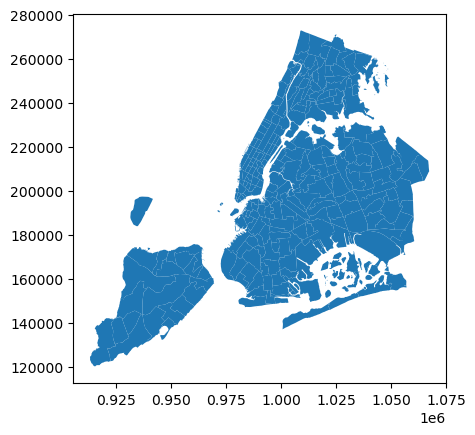

In [177]:
# print(zones.info())
print(zones.info())
# zones.plot()
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [181]:
# Merge zones and trip records using locationID and PULocationID
zone_merged_df = pd.merge(fin_opt_df, zones, left_on='PULocationID', right_on='LocationID', how='left')
zone_merged_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1137827 entries, 0 to 1137826
Data columns (total 31 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   VendorID               1137827 non-null  int64         
 1   tpep_pickup_datetime   1137827 non-null  datetime64[us]
 2   tpep_dropoff_datetime  1137827 non-null  datetime64[us]
 3   passenger_count        1137827 non-null  float64       
 4   trip_distance          1137827 non-null  float64       
 5   RatecodeID             1137827 non-null  float64       
 6   PULocationID           1137827 non-null  int64         
 7   DOLocationID           1137827 non-null  int64         
 8   payment_type           1137827 non-null  int64         
 9   fare_amount            1137827 non-null  float64       
 10  extra                  1137827 non-null  float64       
 11  mta_tax                1137827 non-null  float64       
 12  tip_amount             11378

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [184]:
# Group data by location and calculate the number of trips

trip_counts = zone_merged_df.groupby("PULocationID")["PULocationID"].count().reset_index(name="trip_count")
trip_counts.head()

PULocationID  trip_count
0             4        1289
1             7          84
2            12         356
3            13        6769
4            24        1994

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [187]:
# Merge trip counts back to the zones GeoDataFrame

zones_with_trips = pd.merge(trip_counts, zones, left_on='PULocationID', right_on='LocationID', how='left')

# Fill missing values (for locations with 0 trips)
zones_with_trips["trip_count"] = zones_with_trips["trip_count"].fillna(0)

print(zones_with_trips.info())
print(zones_with_trips.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   PULocationID  121 non-null    int64   
 1   trip_count    121 non-null    int64   
 2   OBJECTID      119 non-null    float64 
 3   Shape_Leng    119 non-null    float64 
 4   Shape_Area    119 non-null    float64 
 5   zone          119 non-null    object  
 6   LocationID    119 non-null    float64 
 7   borough       119 non-null    object  
 8   geometry      119 non-null    geometry
dtypes: float64(4), geometry(1), int64(2), object(2)
memory usage: 8.6+ KB
None
   PULocationID  trip_count  OBJECTID  Shape_Leng  Shape_Area  \
0             4        1289       4.0    0.043567    0.000112   
1             7          84       7.0    0.107417    0.000390   
2            12         356      12.0    0.036661    0.000042   
3            13        6769      13.0    0.050281    0.000149   
4      

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

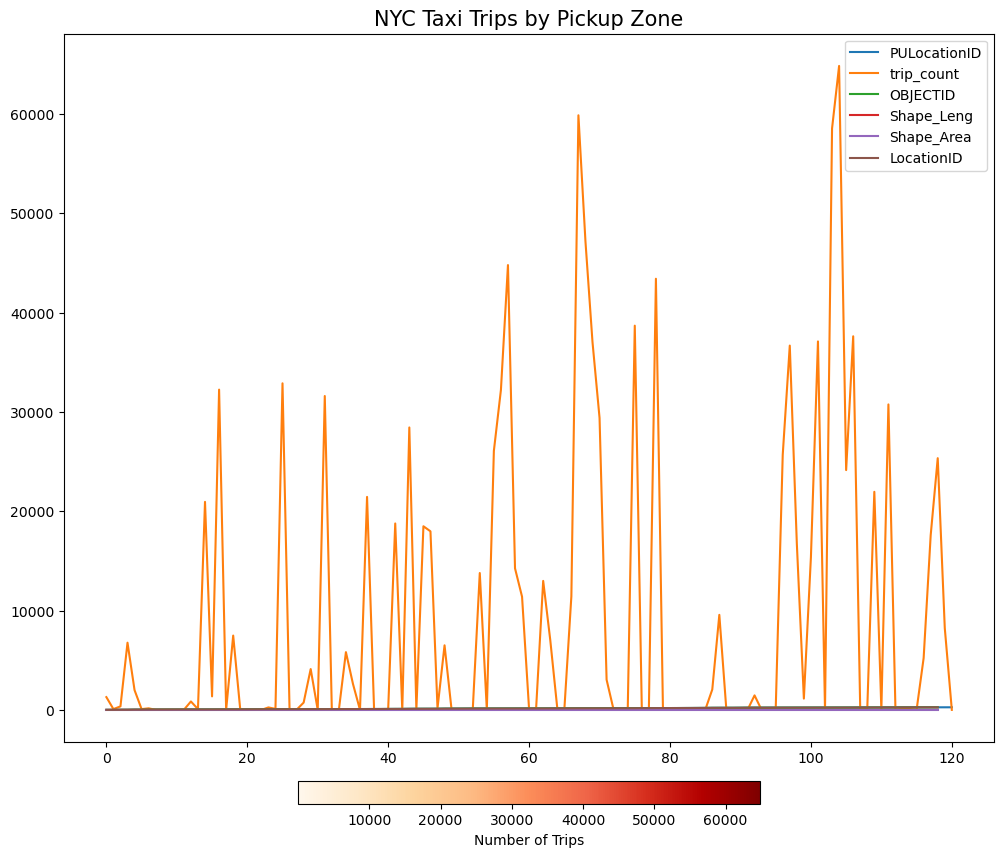

In [194]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize = (12, 10))

# Plot the map and display it
zones_with_trips.plot(column="trip_count",  
                      legend=True,  
                      # legend_kwds={"label": "Number of Trips", "orientation": "horizontal"},
                      ax=ax)

# Fix the legend manually
sm = plt.cm.ScalarMappable(cmap="OrRd", norm=plt.Normalize(vmin=zones_with_trips["trip_count"].min(), 
                                                            vmax=zones_with_trips["trip_count"].max()))
sm._A = []  # Dummy array for scalar mappable
cbar = fig.colorbar(sm, ax=ax, orientation="horizontal", fraction=0.03, pad=0.05)
cbar.set_label("Number of Trips")

# Add a title
ax.set_title("NYC Taxi Trips by Pickup Zone", fontsize=15)

# Show the plot
plt.show()


In [196]:
# can you try displaying the zones DF sorted by the number of trips?

# Sort the zones DataFrame by trip count in descending order
sorted_zones = zones_with_trips.sort_values(by="trip_count", ascending=False)

# Display the first few rows
print(sorted_zones.head(10))

     PULocationID  trip_count  OBJECTID  Shape_Leng  Shape_Area  \
104           237       64843     237.0    0.042213    0.000096   
67            161       59873     161.0    0.035804    0.000072   
103           236       58547     236.0    0.044252    0.000103   
68            162       47167     162.0    0.035270    0.000048   
57            142       44791     142.0    0.038176    0.000076   
78            186       43414     186.0    0.024696    0.000037   
75            170       38690     170.0    0.045769    0.000074   
106           239       37620     239.0    0.063626    0.000205   
101           234       37104     234.0    0.036072    0.000073   
69            163       37031     163.0    0.034177    0.000041   

                             zone  LocationID    borough  \
104         Upper East Side South       237.0  Manhattan   
67                 Midtown Center       161.0  Manhattan   
103         Upper East Side North       236.0  Manhattan   
68                   M

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [206]:
# Find routes which have the slowest speeds at different times of the day
#Cleaning the data to remove trip_duration as 0
fin_opt_df = fin_opt_df[~(fin_opt_df['trip_duration'] == 0)]

# Converting trip duration in hours (convert from minutes to hours)
fin_opt_df["trip_duration_hours"] = fin_opt_df["trip_duration"] / 60

# Calculate speed (miles per hour)
fin_opt_df["trip_speed_mph"] = fin_opt_df["trip_distance"] / fin_opt_df["trip_duration_hours"]

# Method to create a time-of-day column to analyse
def time_of_day(hour):
    if 5 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 17:
        return "Afternoon"
    elif 17 <= hour < 21:
        return "Evening"
    else:
        return "Night"

fin_opt_df["time_of_day"] = fin_opt_df["pu_hour"].apply(time_of_day)

# Now we Group by PULocationID, DOLocationID, and Time of Day, then find average speed
slowest_routes = fin_opt_df.groupby(["PULocationID", "DOLocationID", "time_of_day"])["trip_speed_mph"].mean().reset_index()

# Sort by slowest speeds
slowest_routes = slowest_routes.sort_values(by="trip_speed_mph", ascending=True)

# Display the slowest 10 routes
print(slowest_routes.head(10))


       PULocationID  DOLocationID time_of_day  trip_speed_mph
11795           224             4     Morning             0.0
2413             66           148     Morning             0.0
9085            161            95       Night             0.0
9125            161           138     Morning             0.0
7553            143           148     Morning             0.0
3608             87           138     Morning             0.0
4356             97            42     Evening             0.0
10498           170            26     Morning             0.0
2777             70           209   Afternoon             0.0
1093             42           229     Morning             0.0


How does identifying high-traffic, high-demand routes help us?

- Answer: Identifying hig-traffic routes can help us in two ways, we can either avoid the areas if we do not want the delays or the other side would be to target those areas to get more hires which is similar information we can get from high-demand areas.

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

Busiest Hour: 18 with 85999 trips


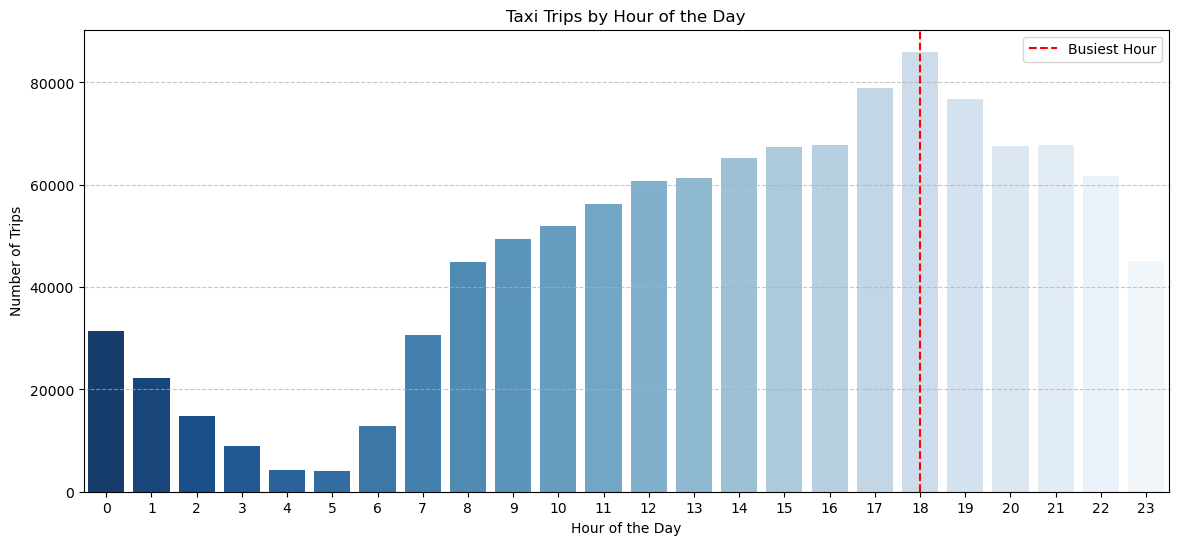

In [210]:
# Visualise the number of trips per hour and find the busiest hour

# Need to Group by pickup hour and count trips
hourly_trips = fin_opt_df.groupby("pu_hour").size().reset_index(name="trip_count")

# Find the busiest hour
busiest_hour = hourly_trips.loc[hourly_trips["trip_count"].idxmax()]
print(f"Busiest Hour: {busiest_hour['pu_hour']} with {busiest_hour['trip_count']} trips")

# Plot the number of trips per hour
plt.figure(figsize=(14, 6))
sns.barplot(x=hourly_trips["pu_hour"], y=hourly_trips["trip_count"], palette="Blues_r")

# Add labels and title
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Trips")
plt.title("Taxi Trips by Hour of the Day")
plt.xticks(range(24))  # Ensure all hours are displayed
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the busiest hour with annotation
plt.axvline(busiest_hour["pu_hour"], color="red", linestyle="--", label="Busiest Hour")
plt.legend()

# Show the plot
plt.show()

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [214]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.05
scaling_factor = 1/sample_fraction

#Scalel up the trip count
hourly_trips['scaled_trip_count'] = hourly_trips['trip_count'] * scaling_factor

# Busiest hour would be
scaled_busiest_hour = hourly_trips.loc[hourly_trips['scaled_trip_count'].idxmax()]
print(f"Scaled busiest hour: {scaled_busiest_hour['pu_hour']} with ~{scaled_busiest_hour['scaled_trip_count']:.0f} trips")


Scaled busiest hour: 18.0 with ~1719980 trips


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

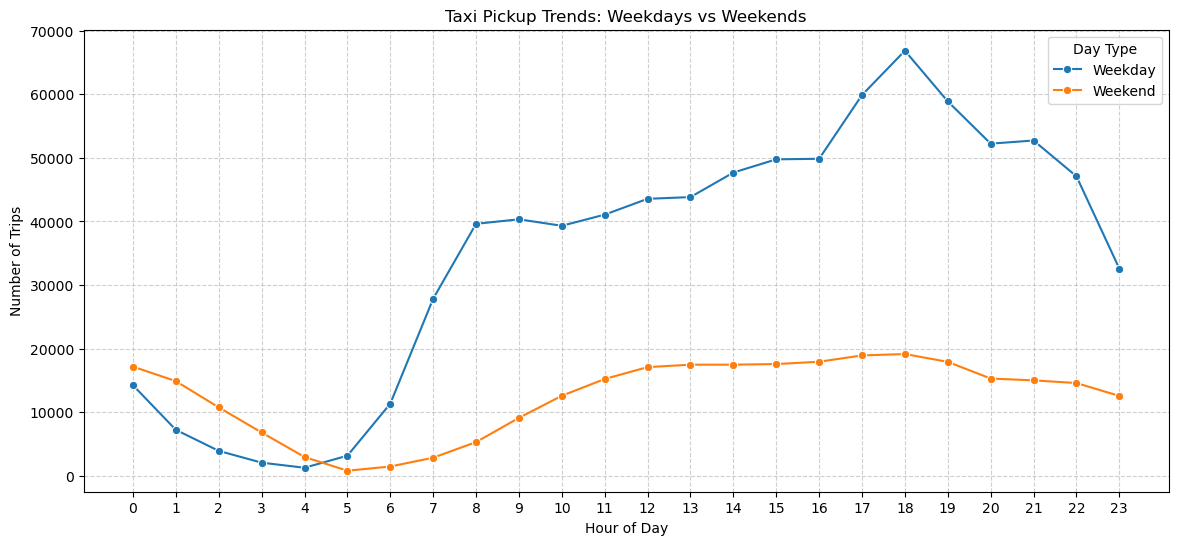

In [217]:
# Compare traffic trends for the week days and weekends

#Labeling the data with Weekday or Weekend
fin_opt_df['day_type'] = fin_opt_df['pu_dayofweek'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# Count trips by hour and day type
trips_by_hour_type = fin_opt_df.groupby(['pu_hour', 'day_type']).size().reset_index(name='trip_count')

# Plot trends using seaborn
plt.figure(figsize=(14, 6))
sns.lineplot(data=trips_by_hour_type, x='pu_hour', y='trip_count', hue='day_type', marker='o')

# Add labels and formatting
plt.title('Taxi Pickup Trends: Weekdays vs Weekends')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.xticks(range(24))
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Day Type')

# Show the plot
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

- Answer: Weekdays are more busy during work/office hours seems like and peaking around the 6 PM time whereas on weeends it is more constant from morning to late night. This also tells us that most of the trips happens between office hours in weekdays.

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [221]:
# Find top 10 pickup and dropoff zones

# Top 10 Pickup Zones
top_pickups = fin_opt_df.groupby("PULocationID").size().reset_index(name="pickup_count")
top_pickups = top_pickups.sort_values(by="pickup_count", ascending=False).head(10)

# Top 10 Dropoff Zones
top_dropoffs = fin_opt_df.groupby("DOLocationID").size().reset_index(name="dropoff_count")
top_dropoffs = top_dropoffs.sort_values(by="dropoff_count", ascending=False).head(10)

# Merge pickup zones with names
top_pickups = top_pickups.merge(zones[['LocationID', 'zone']], left_on='PULocationID', right_on='LocationID', how='left')

# Merge dropoff zones with names
top_dropoffs = top_dropoffs.merge(zones[['LocationID', 'zone']], left_on='DOLocationID', right_on='LocationID', how='left')

print("Top 10 Pickup Zones:")
print(top_pickups[['zone', 'pickup_count']])

print("\nTop 10 Dropoff Zones:")
print(top_dropoffs[['zone', 'dropoff_count']])


Top 10 Pickup Zones:
                           zone  pickup_count
0         Upper East Side South         64840
1                Midtown Center         59873
2         Upper East Side North         58547
3                  Midtown East         47166
4           Lincoln Square East         44791
5  Penn Station/Madison Sq West         43414
6                   Murray Hill         38688
7         Upper West Side South         37619
8                      Union Sq         37104
9                 Midtown North         37031

Top 10 Dropoff Zones:
                    zone  dropoff_count
0  Upper East Side North          61383
1  Upper East Side South          57774
2         Midtown Center          48437
3            Murray Hill          38251
4  Upper West Side South          37936
5    Lincoln Square East          37593
6           Midtown East          36207
7        Lenox Hill West          35954
8               Union Sq          31932
9           East Chelsea          31645


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [224]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
# Count pickups per zone
pickup_counts = fin_opt_df.groupby('PULocationID').size().reset_index(name='pickup_count')

# Count dropoffs per zone
dropoff_counts = fin_opt_df.groupby('DOLocationID').size().reset_index(name='dropoff_count')

# Merge on location ID
zone_stats = pd.merge(pickup_counts, dropoff_counts, left_on='PULocationID', right_on='DOLocationID', how='outer')

# Fill NaN with 0
zone_stats = zone_stats.fillna(0)

# Keep one consistent column for zone ID
zone_stats['LocationID'] = zone_stats['PULocationID'].combine_first(zone_stats['DOLocationID'])

# Avoid division by zero
zone_stats['pickup_to_dropoff_ratio'] = zone_stats.apply(
    lambda row: row['pickup_count'] / row['dropoff_count'] if row['dropoff_count'] != 0 else float('inf'),
    axis=1
)

# Merge with zone names from the zones GeoDataFrame
zone_ratios = zone_stats.merge(zones[['LocationID', 'zone']], left_on='LocationID', right_on='LocationID', how='left')

# Top 10 highest pickup/dropoff ratios
top_ratios = zone_ratios.sort_values(by='pickup_to_dropoff_ratio', ascending=False).head(10)

# Bottom 10 lowest pickup/dropoff ratios (excluding 0 dropoffs to avoid inf)
bottom_ratios = zone_ratios[zone_stats['dropoff_count'] != 0].sort_values(by='pickup_to_dropoff_ratio').head(10)

# Display
print("Top 10 Zones by Pickup/Dropoff Ratio:")
print(top_ratios[['zone', 'pickup_count', 'dropoff_count', 'pickup_to_dropoff_ratio']])

print("\nBottom 10 Zones by Pickup/Dropoff Ratio:")
print(bottom_ratios[['zone', 'pickup_count', 'dropoff_count', 'pickup_to_dropoff_ratio']])


Top 10 Zones by Pickup/Dropoff Ratio:
                             zone  pickup_count  dropoff_count  \
19                       Canarsie           1.0            0.0   
41                  East Elmhurst          18.0            4.0   
84                    JFK Airport          15.0            6.0   
122  Penn Station/Madison Sq West       43414.0        26358.0   
72        Greenwich Village South       17982.0        12825.0   
23                   Central Park       20947.0        14961.0   
166                  West Village       30759.0        23185.0   
107                  Midtown East       47166.0        36207.0   
64               Garment District       18774.0        14656.0   
106                Midtown Center       59873.0        48437.0   

     pickup_to_dropoff_ratio  
19                       inf  
41                  4.500000  
84                  2.500000  
122                 1.647090  
72                  1.402105  
23                  1.400107  
166               

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [227]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

# Night hours: 11 PM (23) to 5 AM (5)
night_hours = [23, 0, 1, 2, 3, 4, 5]

# Filter only night-hour trips
night_trips = fin_opt_df[fin_opt_df['pu_hour'].isin(night_hours)]

# Count pickups by zone during night hours
night_pickups = (
    night_trips.groupby("PULocationID")
    .size()
    .reset_index(name="pickup_count")
    .sort_values(by="pickup_count", ascending=False)
    .head(10)
)

# Count dropoffs by zone during night hours
night_dropoffs = (
    night_trips.groupby("DOLocationID")
    .size()
    .reset_index(name="dropoff_count")
    .sort_values(by="dropoff_count", ascending=False)
    .head(10)
)

# Merge pickup zone names
night_pickups_named = night_pickups.merge(zones[['LocationID', 'zone']], left_on='PULocationID', right_on='LocationID', how='left')

# Merge dropoff zone names
night_dropoffs_named = night_dropoffs.merge(zones[['LocationID', 'zone']], left_on='DOLocationID', right_on='LocationID', how='left')


print("Top 10 Pickup Zones (11 PM – 5 AM):")
print(night_pickups_named[['zone', 'pickup_count']])

print("\nTop 10 Dropoff Zones (11 PM – 5 AM):")
print(night_dropoffs_named[['zone', 'dropoff_count']])


Top 10 Pickup Zones (11 PM – 5 AM):
                           zone  pickup_count
0                  East Village         11604
1                  West Village          9345
2               Lower East Side          7063
3                  Clinton East          6982
4       Greenwich Village South          6589
5     Times Sq/Theatre District          4841
6  Penn Station/Madison Sq West          4622
7                 Midtown South          4184
8                      Gramercy          4126
9                  East Chelsea          4016

Top 10 Dropoff Zones (11 PM – 5 AM):
                            zone  dropoff_count
0                   East Village           6077
1                    Murray Hill           4536
2                   Clinton East           4522
3                       Gramercy           4426
4                Lenox Hill West           4011
5                   East Chelsea           3990
6                   West Village           3758
7                 Yorkville West    

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [230]:
# Filter for night hours (11 PM to 5 AM)

# Add a column classifying trips as 'Night' or 'Day'
fin_opt_df['time_period'] = fin_opt_df['pu_hour'].apply(
    lambda x: 'Night' if x in night_hours else 'Day'
)

# Group by time period and sum total revenue
revenue_by_period = fin_opt_df.groupby('time_period')['total_amount'].sum().reset_index()

# Calculate share as a percentage of total
total_revenue = revenue_by_period['total_amount'].sum()
revenue_by_period['revenue_share_pct'] = (revenue_by_period['total_amount'] / total_revenue) * 100

print("Revenue Share by Time Period (Night vs. Day):")
print(revenue_by_period)



Revenue Share by Time Period (Night vs. Day):
  time_period  total_amount  revenue_share_pct
0         Day   21804034.96          88.335956
1       Night    2879045.28          11.664044


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [234]:
# Analyse the fare per mile per passenger for different passenger counts

# Ensure valid data: non-zero distance and passenger count
valid_fare_data = fin_opt_df[
    (fin_opt_df['trip_distance'] > 0) & 
    (fin_opt_df['passenger_count'] > 0)
]

# Calculate fare per mile per passenger for each trip
valid_fare_data['fare_per_mile_per_passenger'] = (
    valid_fare_data['fare_amount'] / valid_fare_data['trip_distance']
) / valid_fare_data['passenger_count']

# Group by passenger_count and calculate the average
fare_stats = valid_fare_data.groupby('passenger_count')['fare_per_mile_per_passenger'].mean().reset_index()

# Sort for better viewing
fare_stats = fare_stats.sort_values(by='passenger_count')

# Display the results
print("Average Fare Per Mile Per Passenger by Passenger Count:")
print(fare_stats)


Average Fare Per Mile Per Passenger by Passenger Count:
   passenger_count  fare_per_mile_per_passenger
0              1.0                     8.293891
1              2.0                     4.127604
2              3.0                     2.774289


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [237]:
# Compare the average fare per mile for different days and for different times of the day

# Only keep trips with non-zero distance and fare
valid_fare_data = fin_opt_df[
    (fin_opt_df['trip_distance'] > 0) & 
    (fin_opt_df['fare_amount'] > 0)
].copy()

# Calculate fare per mile
valid_fare_data['fare_per_mile'] = valid_fare_data['fare_amount'] / valid_fare_data['trip_distance']

# Label days
valid_fare_data['day_name'] = valid_fare_data['pu_dayofweek'].apply(lambda x: day_labels[x])

#Average fare by day of the week
avg_fare_by_day = (
    valid_fare_data.groupby('day_name')['fare_per_mile']
    .mean()
    .reindex(day_labels)
    .reset_index()
)

#Average fare by time of the day
avg_fare_by_time = (
    valid_fare_data.groupby('time_of_day')['fare_per_mile']
    .mean()
    .reindex(['Morning', 'Afternoon', 'Evening', 'Night'])
    .reset_index()
)


print("Average fare by day of the week: ", avg_fare_by_day)
print("\nAverage fare by time of the day: ", avg_fare_by_time)

Average fare by day of the week:    day_name  fare_per_mile
0      Mon       8.030951
1      Tue       8.580792
2      Wed       8.663315
3      Thu       8.663367
4      Fri       8.294889
5      Sat       7.998181
6      Sun       7.526460

Average fare by time of the day:    time_of_day  fare_per_mile
0     Morning       8.306937
1   Afternoon       9.123467
2     Evening       8.434522
3       Night       7.047129


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

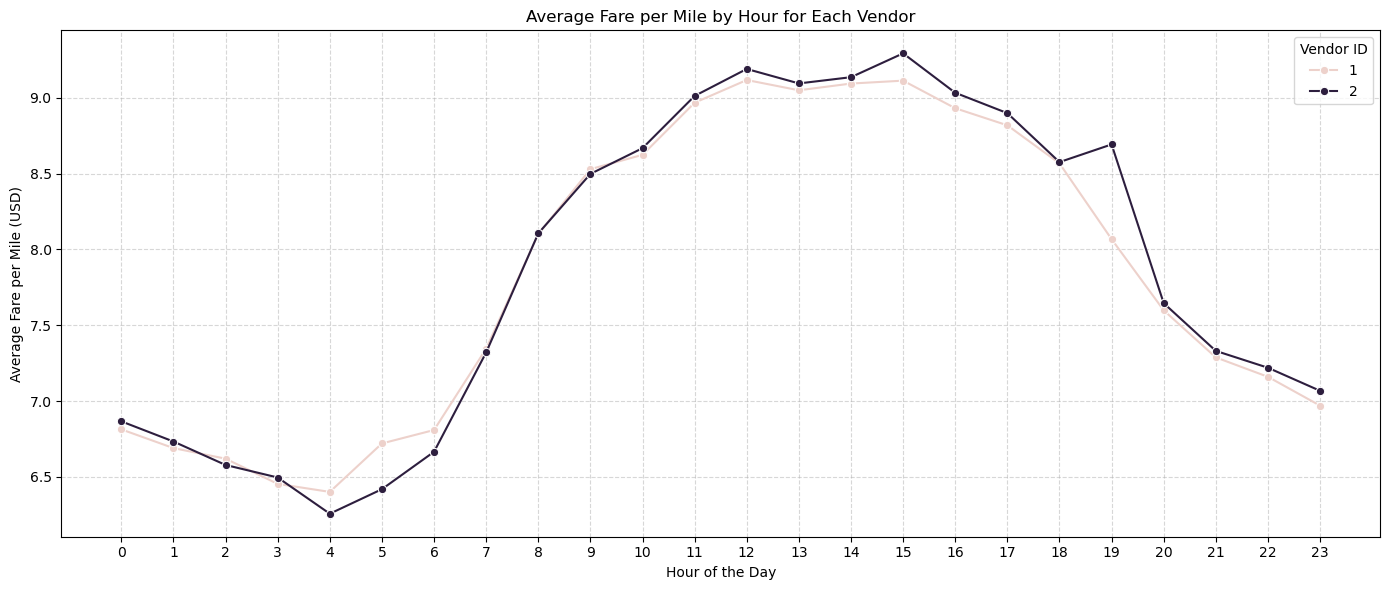

In [240]:
# Compare fare per mile for different vendors
# Group by VendorID and pickup_hour, calculate mean fare per mile
vendor_hourly_fares = valid_fare_data.groupby(['VendorID', 'pu_hour'])['fare_per_mile'].mean().reset_index()

#Plotting the fares per vendor
plt.figure(figsize=(14, 6))
sns.lineplot(data=vendor_hourly_fares, x='pu_hour', y='fare_per_mile', hue='VendorID', marker='o')

plt.title("Average Fare per Mile by Hour for Each Vendor")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Fare per Mile (USD)")
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title="Vendor ID")
plt.tight_layout()
plt.show()



**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


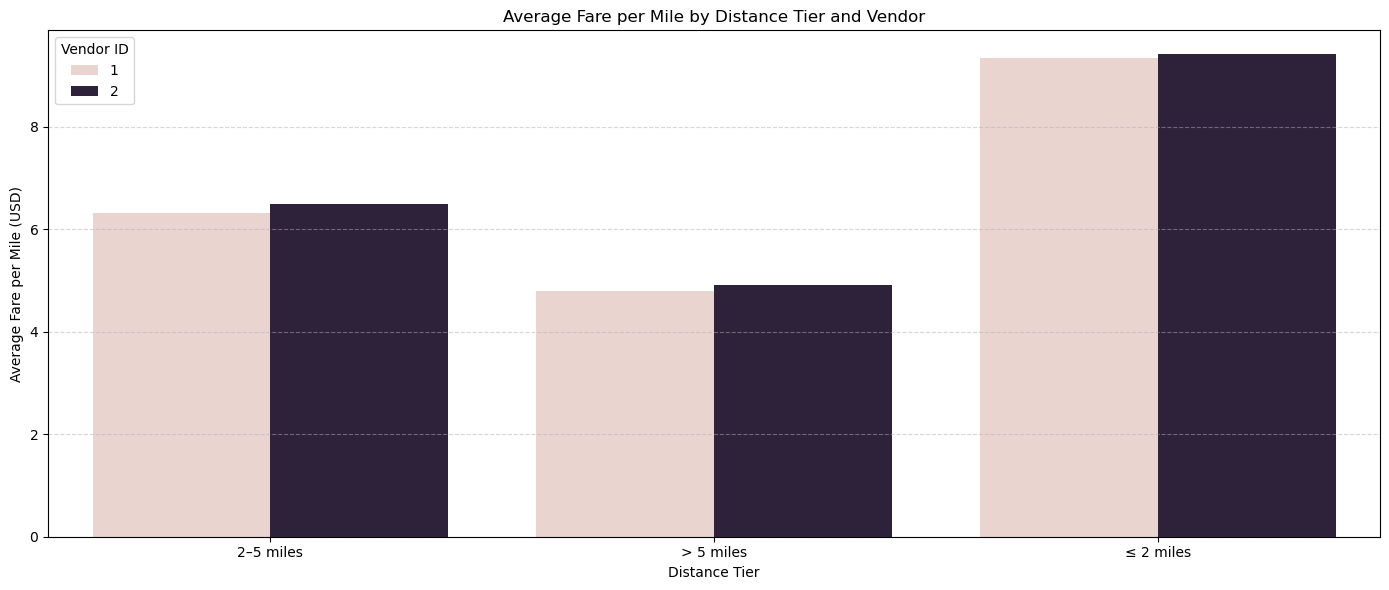

In [243]:
# Defining distance tiers

# Method for tier classification
def classify_tier(dist):
    if dist <= 2:
        return '≤ 2 miles'
    elif dist <= 5:
        return '2–5 miles'
    else:
        return '> 5 miles'

# Creating distance tier column
valid_fare_data['distance_tier'] = valid_fare_data['trip_distance'].apply(classify_tier)

# Group and calculate average fare per mile
tiered_vendor_fares = (
    valid_fare_data.groupby(['VendorID', 'distance_tier'])['fare_per_mile']
    .mean()
    .reset_index()
)

# Plotting for comparision
plt.figure(figsize=(14, 6))
sns.barplot(data=tiered_vendor_fares, x='distance_tier', y='fare_per_mile', hue='VendorID')

plt.title("Average Fare per Mile by Distance Tier and Vendor")
plt.xlabel("Distance Tier")
plt.ylabel("Average Fare per Mile (USD)")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(title="Vendor ID")
plt.tight_layout()
plt.show()

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

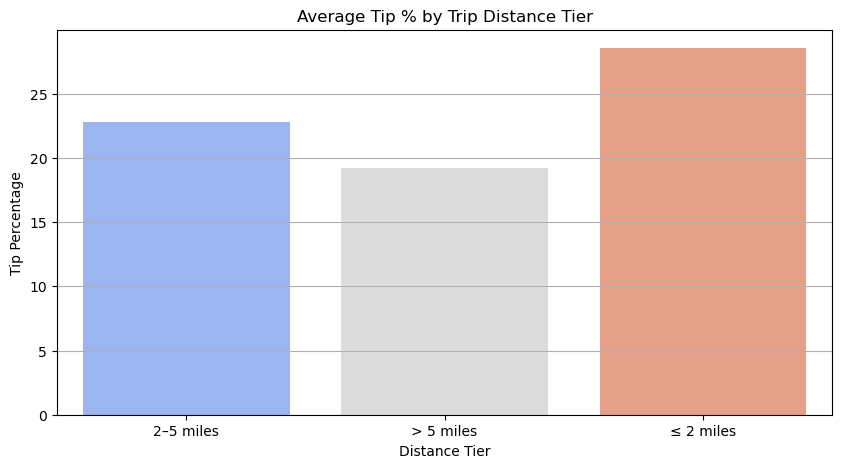

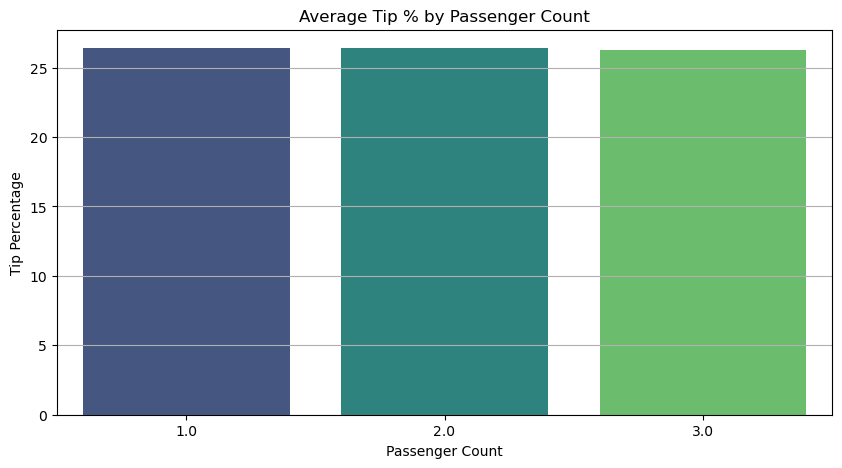

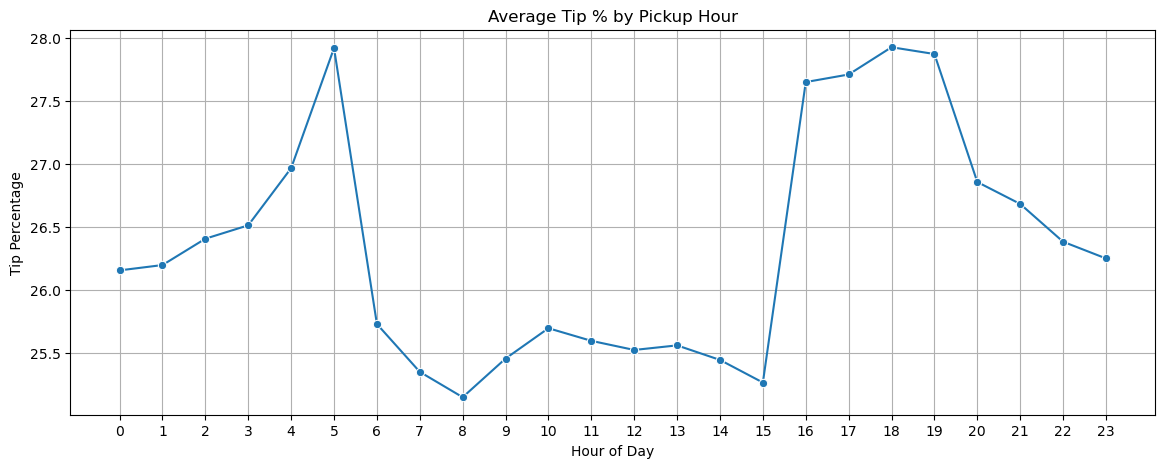

In [247]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

# Calculate tip percentage relative to fare amount
valid_fare_data['tip_percent'] = (valid_fare_data['tip_amount'] / valid_fare_data['fare_amount']) * 100

# # Tip percentage by distance tier
tip_by_distance = valid_fare_data.groupby('distance_tier')['tip_percent'].mean().reset_index()

# Tip percentage by passenger count
tip_by_passenger = valid_fare_data.groupby('passenger_count')['tip_percent'].mean().reset_index()

# Tip percentage by hour
tip_by_hour = valid_fare_data.groupby('pu_hour')['tip_percent'].mean().reset_index()

# Plotting tip_by_distance for analysis
plt.figure(figsize=(10, 5))
sns.barplot(x='distance_tier', y='tip_percent', data=tip_by_distance, palette='coolwarm')
plt.title('Average Tip % by Trip Distance Tier')
plt.xlabel('Distance Tier')
plt.ylabel('Tip Percentage')
plt.grid(axis='y')
plt.show()

# Plotting tip_by_passenger for analysis
plt.figure(figsize=(10, 5))
sns.barplot(x='passenger_count', y='tip_percent', data=tip_by_passenger, palette='viridis')
plt.title('Average Tip % by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Tip Percentage')
plt.grid(axis='y')
plt.show()

# Plotting tip_by_hour for analysis
plt.figure(figsize=(14, 5))
sns.lineplot(x='pu_hour', y='tip_percent', data=tip_by_hour, marker='o')
plt.title('Average Tip % by Pickup Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Tip Percentage')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [250]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%



**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

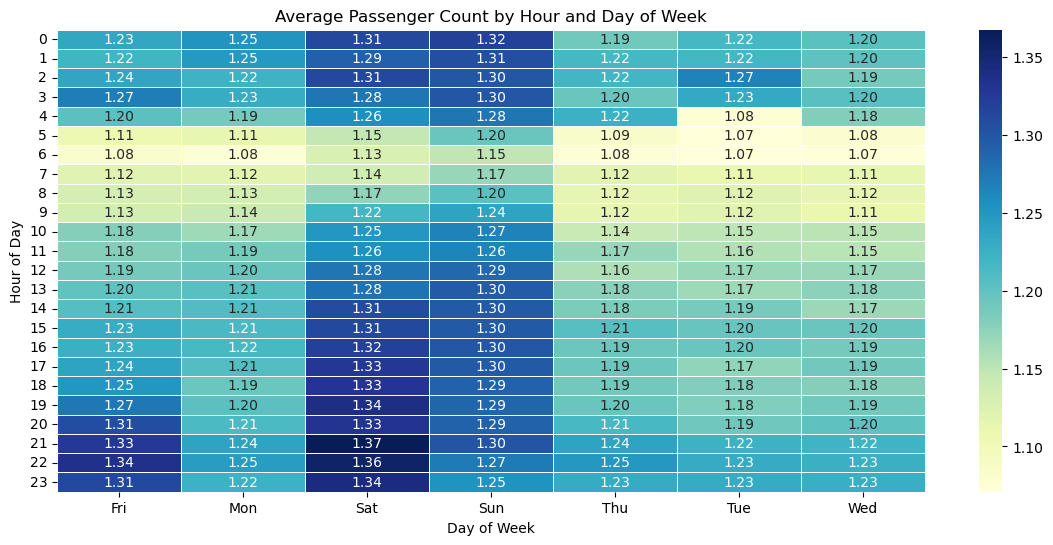

In [253]:
# See how passenger count varies across hours and days

# Group by hour and day to find mean passenger count
passenger_avg = valid_fare_data.groupby(['pu_hour', 'day_name'])['passenger_count'].mean().reset_index()

# Pivot for heatmap structure (rows = hours, columns = days)
passenger_pivot = passenger_avg.pivot(index='pu_hour', columns='day_name', values='passenger_count')

plt.figure(figsize=(14, 6))
sns.heatmap(passenger_pivot, annot=True, fmt=".2f", cmap='YlGnBu', linewidths=.5)

plt.title("Average Passenger Count by Hour and Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Hour of Day")
plt.yticks(rotation=0)
plt.show()

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

Top 10 Zones with Highest Average Passenger Count:
                 zone  passenger_count
95   Sunset Park West         3.000000
38           Flushing         3.000000
8      Bushwick North         2.000000
81      Prospect Park         2.000000
84          Ridgewood         2.000000
110    West Concourse         1.800000
120               NaN         1.600000
11    Carroll Gardens         1.545455
9      Bushwick South         1.400000
2        Battery Park         1.337079

Bottom 10 Zones with Lowest Average Passenger Count:
                         zone  passenger_count
79  Prospect-Lefferts Gardens              1.0
83                   Red Hook              1.0
85           Roosevelt Island              1.0
89      Soundview/Castle Hill              1.0
90         South Williamsburg              1.0
91                   Steinway              1.0
93         Stuyvesant Heights              1.0
10                   Canarsie              1.0
42                  Glen Oaks              

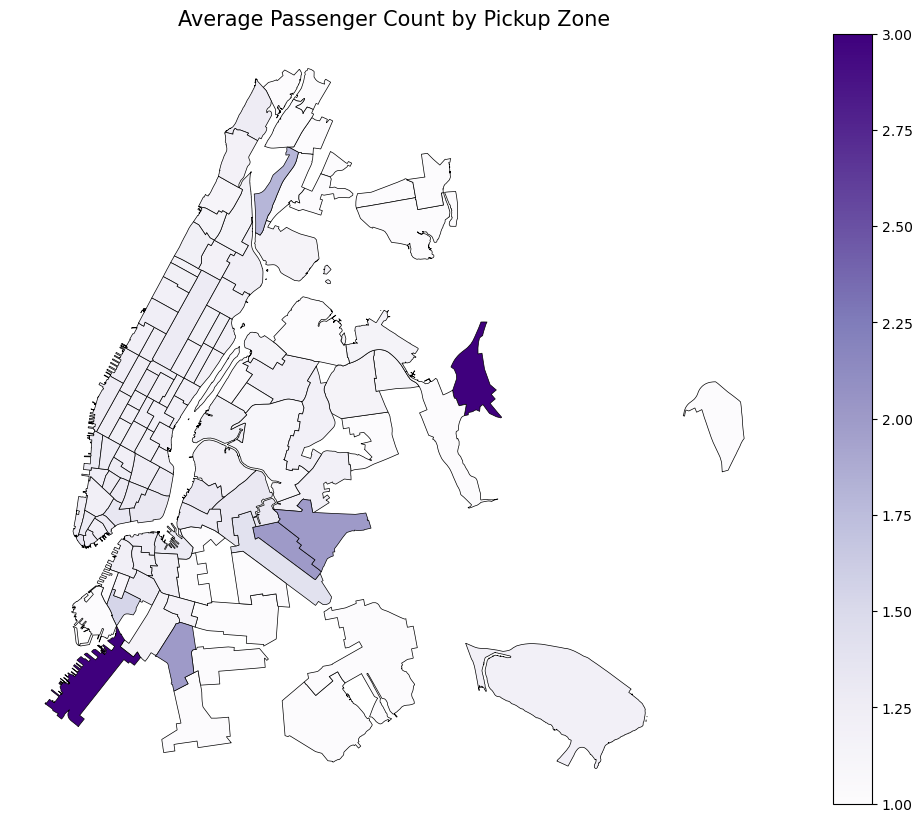

In [256]:
# How does passenger count vary across zones

# Group by PULocationID and calculate average passenger count
passenger_by_zone = fin_opt_df.groupby("PULocationID")["passenger_count"].mean().reset_index()

# Merge with taxi zones to get zone names
passenger_by_zone = passenger_by_zone.merge(zones[['LocationID', 'zone']], left_on='PULocationID', right_on='LocationID', how='left')

# Sort zones by average passenger count
sorted_passenger = passenger_by_zone.sort_values(by="passenger_count", ascending=False)

# Display top 10 zones with highest average passenger count
print("Top 10 Zones with Highest Average Passenger Count:")
print(sorted_passenger[['zone', 'passenger_count']].head(10))

# Display bottom 10 zones with lowest average passenger count
print("\nBottom 10 Zones with Lowest Average Passenger Count:")
print(sorted_passenger[['zone', 'passenger_count']].tail(10))

# Merge average passenger count into the GeoDataFrame
zones_passenger_map = zones.merge(passenger_by_zone, left_on='LocationID', right_on='PULocationID', how="left")

# Plotting for analysis
fig, ax = plt.subplots(1, 1, figsize=(14, 10))
zones_passenger_map.plot(column="passenger_count",
                         cmap="Purples",
                         linewidth=0.5,
                         edgecolor="black",
                         legend=True,
                         ax=ax)

ax.set_title("Average Passenger Count by Pickup Zone", fontsize=15)
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)
plt.show()

Find out how often surcharges/extra charges are applied to understand their prevalance

                 zone  avg_passenger_count
95   Sunset Park West             3.000000
38           Flushing             3.000000
8      Bushwick North             2.000000
81      Prospect Park             2.000000
84          Ridgewood             2.000000
110    West Concourse             1.800000
120               NaN             1.600000
11    Carroll Gardens             1.545455
9      Bushwick South             1.400000
2        Battery Park             1.337079


AttributeError: Line2D.set() got an unexpected keyword argument 'edgecolor'

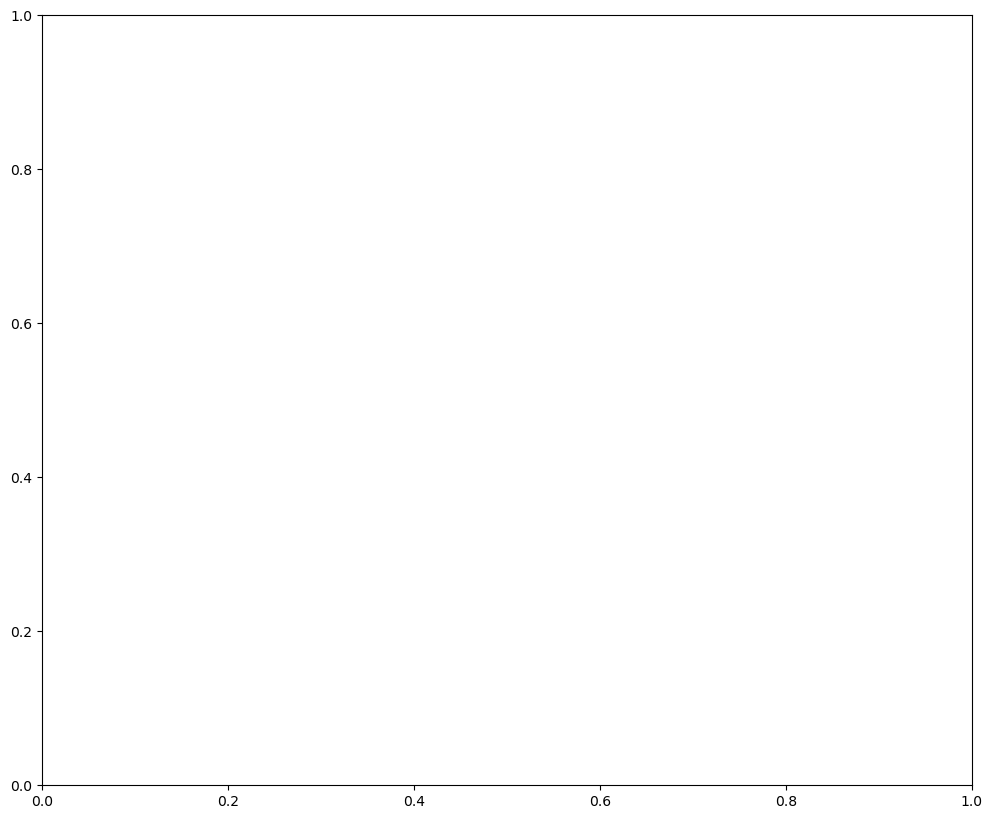

In [259]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.

# Group by pickup zone and calculate average passenger count
avg_passenger_per_zone = fin_opt_df.groupby("PULocationID")["passenger_count"].mean().reset_index()
avg_passenger_per_zone.rename(columns={"passenger_count": "avg_passenger_count"}, inplace=True)

# Merge the average passenger count into zones_with_trips GeoDataFrame
zones_with_trips = zones_with_trips.merge(avg_passenger_per_zone, on="PULocationID", how="left")

# Preview updated GeoDataFrame
print(zones_with_trips[["zone", "avg_passenger_count"]].sort_values(by="avg_passenger_count", ascending=False).head(10))

# Plotting for analysis
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
zones_with_trips.plot(column="avg_passenger_count",
                      cmap="YlGnBu",
                      edgecolor="black",
                      linewidth=0.4,
                      legend=True,
                      ax=ax)

ax.set_title("Average Passenger Count by Pickup Zone", fontsize=15)
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)
plt.show()

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

Frequency of Each Surcharge (Extra Column):
    extra_amount  trip_count  percentage
0           0.00      418759   36.804013
13          0.01           1    0.000088
11          0.03           1    0.000088
9           0.25           1    0.000088
2           1.00      246207   21.638712
10          1.05           1    0.000088
1           2.50      330899   29.082147
8           2.72           4    0.000352
7           3.00          27    0.002373
12          3.05           1    0.000088
6           3.20          36    0.003164
3           3.50       79999    7.030975
4           5.00       61807    5.432112
5           6.00          65    0.005713


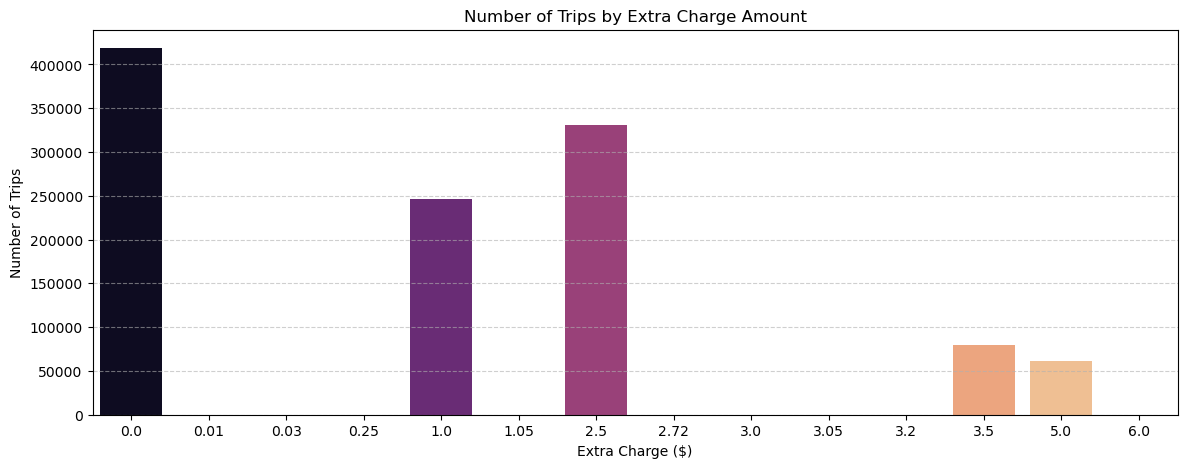

In [262]:
# How often is each surcharge applied?

# Count occurrences of each 'extra' value
extra_counts = fin_opt_df['extra'].value_counts().reset_index()
extra_counts.columns = ['extra_amount', 'trip_count']
extra_counts = extra_counts.sort_values(by='extra_amount')

# Add percentage of total trips
total_trips = fin_opt_df.shape[0]
extra_counts['percentage'] = (extra_counts['trip_count'] / total_trips) * 100

print("Frequency of Each Surcharge (Extra Column):")
print(extra_counts)

# Plotting for analysis
plt.figure(figsize=(14, 5))
sns.barplot(x='extra_amount', y='trip_count', data=extra_counts, palette='magma')
plt.title('Number of Trips by Extra Charge Amount')
plt.xlabel('Extra Charge ($)')
plt.ylabel('Number of Trips')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

### Some recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies
- We have identified peak hours and demand spikes timings through which we can allocate drivers to high demand zones and can also increase the number of drivers in high-demand zones at peak hours.
- We can target high demand zones where pickup/dropoff densities are high and direct idle drivers to those zones.
- We can also identify real time traffic congested area and inform drivers to avoid such areas during rush-hours.
- We have identified zones with high demands in different time of the day and days of the week, we can utilize ML models to predict/forecast demand and zone and can pre-position drivers in such a way to be more efficient.
- We have also noticed that some short trips can have high fare and long trips can have better value but more time consuming, we can introduce some flat rates for short trips and prirotize long trips during the slow time.
- We can identify some underserved areas and if we can incitivize drivers in idle time to serve these areas, can be more efficient.

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

### Some suggestions on the above
- As per the time of the day, we can do some zone targeting shifts by rush hour and night time.
- Can direct drivers around entertainment related zones on weekends than in weekdays around corporate zones to capture major portion.
- We can prioritize longer trips like from Hotels and Airports which will also add some extras.
- We can have larger taxis in areas where we see the demand is more for group based rides.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

### Some pricing strategies can be
- We can implement some distance based tier fare multipliers like short trips under 2 miles will have higher fare per mile, trips over 5 miles can have lower per mile fare but higher total fare and offering some discounts for longer trips.
- We can also look into surging the rate in high-demand zones and late night timings, weekends, bad weather, holidays etc.
- Can also implement some surcharges for high-demand/high-traffic zone, zones like airports etc.
- Implement some idle time charges and miniimum fare regardless of distance.
- Promoting reservations or pre-booking with some discounts.
- Adjusting rates based on competitor rates.